# Part - Loan Data from Prosper
## by Chih-Chuan Ma

## Introduction

> The dataset records the information of personal loan from Prosper Funding LLC, which mainly runs the business of lending money, creidt card, home equity and personal investment. The oringal dataset contains up to 113,937 data and 81 variables, including range of income, the purpose of loan, region, status of employment, result of the loan application, and even the frequencies of loan inquiries in a certain time span..etc.

> In this project, preliminary data wrangling, such as missing data and duplicates removal, will be performed. Also, the value of a certain features, such as  occupation, listing of categories and duration of employment level, are transformed for better understanding. A few nenessary variables for further analysis are reserved as well. The main interest of the analysis is to explore the relationships among cost of borrowering (the APR) and various features. As requested, the data will be investegated followed by visualization of univariate, bivariate, and multi-variate plots.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# Load the dataset
df_listing = pd.read_csv('/Users/johnma/Desktop/Udacity_Data Scientist/Project 1/Seattle_airbnb/listings.csv')
df_review = pd.read_csv('/Users/johnma/Desktop/Udacity_Data Scientist/Project 1/Seattle_airbnb/listings.csv')
calendar
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Explore the dimension of the orgin dataset

print ('The dimension of the cleaned dataset is', df.shape)
print ('==============================')
print (df.info())

The dimension of the cleaned dataset is (113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield    

In [4]:
# Transform the format of variables into lower case

df.columns = df.columns.str.lower()

# Check whether the transformation is done
df.columns

Index(['listingkey', 'listingnumber', 'listingcreationdate', 'creditgrade',
       'term', 'loanstatus', 'closeddate', 'borrowerapr', 'borrowerrate',
       'lenderyield', 'estimatedeffectiveyield', 'estimatedloss',
       'estimatedreturn', 'prosperrating (numeric)', 'prosperrating (alpha)',
       'prosperscore', 'listingcategory (numeric)', 'borrowerstate',
       'occupation', 'employmentstatus', 'employmentstatusduration',
       'isborrowerhomeowner', 'currentlyingroup', 'groupkey',
       'datecreditpulled', 'creditscorerangelower', 'creditscorerangeupper',
       'firstrecordedcreditline', 'currentcreditlines', 'opencreditlines',
       'totalcreditlinespast7years', 'openrevolvingaccounts',
       'openrevolvingmonthlypayment', 'inquirieslast6months', 'totalinquiries',
       'currentdelinquencies', 'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization',
       'availa

In [5]:
## Check variables with missing values
# By showing the number of missing value, it's hard to tell the severece of the absent items

missing_df = df.isna().sum().sort_values(ascending=False)
print (missing_df.to_string());

groupkey                               100596
loanfirstdefaultedcyclenumber           96985
scorexchangeattimeoflisting             95009
prosperprincipaloutstanding             91852
prosperprincipalborrowed                91852
prosperpaymentsonemonthpluslate         91852
prosperpaymentslessthanonemonthlate     91852
ontimeprosperpayments                   91852
totalprosperloans                       91852
totalprosperpaymentsbilled              91852
creditgrade                             84984
closeddate                              58848
prosperrating (alpha)                   29084
prosperscore                            29084
estimatedreturn                         29084
prosperrating (numeric)                 29084
estimatedloss                           29084
estimatedeffectiveyield                 29084
debttoincomeratio                        8554
employmentstatusduration                 7625
amountdelinquent                         7622
currentcreditlines                

In [6]:
## Check null in all columns by percentage
# The clolumns with missing values over 25% should be deleted.
# Except 'borrowerapr', rows with missing values should be deleted 
# since it does not make sense to fill-in the mean value and it's not possible to retrieve those information
# The blank value of 'borrowerapr' can be filled in average value, the impact of this manuever should be minor

null_percentage = (df.isnull().sum() / df.shape[0]*100).round(2)

print(null_percentage.sort_values(ascending=False).to_string());


groupkey                               88.29
loanfirstdefaultedcyclenumber          85.12
scorexchangeattimeoflisting            83.39
prosperprincipaloutstanding            80.62
prosperprincipalborrowed               80.62
prosperpaymentsonemonthpluslate        80.62
prosperpaymentslessthanonemonthlate    80.62
ontimeprosperpayments                  80.62
totalprosperloans                      80.62
totalprosperpaymentsbilled             80.62
creditgrade                            74.59
closeddate                             51.65
prosperrating (alpha)                  25.53
prosperscore                           25.53
estimatedreturn                        25.53
prosperrating (numeric)                25.53
estimatedloss                          25.53
estimatedeffectiveyield                25.53
debttoincomeratio                       7.51
employmentstatusduration                6.69
amountdelinquent                        6.69
currentcreditlines                      6.67
bankcardut

In [7]:
# The listing category should be obj rather than integar.
df['listingcategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12])

In [8]:
# Check the duration of employment
# I would cut the bins by different duration of employment

df['employmentstatusduration'].describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: employmentstatusduration, dtype: float64

In [9]:
# Check the titles of occupation
# Several similar job titles should be integrated, such as student and nurse...etc

df['occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


### Data Wrangling items
> 1. Use lower case for the header of columns
> 2. Delete columns if missing values is over 25% of overall data
> 3. Fill in the mean value for the missing value in 'borrowerapr'
> 4. Remove rows with missing value
> 5. Remove duplicate values
> 6. Extract "Date' & 'Month' from 'listingcreationdate'; 'listingcreationdate' can be removed
> 7. Reserve necessary columns by reviewing the description of all variables
> 8. Transform duration of employment into categories
> 9. Transform listing category from integar into description
> 10. Combine similar job description to trim titles of occupation

In [10]:
# Make a copy of original dataset
df_clean = df.copy()

In [11]:
# Remove list of columns having more than 25% null

col_to_drop = null_percentage[null_percentage>25].keys()
df_clean = df_clean.drop(col_to_drop, axis=1)

null_percentage_clean = (df_clean.isnull().sum() / df.shape[0]*100).round(2)
print(null_percentage_clean.sort_values(ascending=False).to_string());

debttoincomeratio                     7.51
amountdelinquent                      6.69
employmentstatusduration              6.69
revolvingcreditbalance                6.67
bankcardutilization                   6.67
opencreditlines                       6.67
publicrecordslast12months             6.67
currentcreditlines                    6.67
availablebankcardcredit               6.62
totaltrades                           6.62
tradesneverdelinquent (percentage)    6.62
tradesopenedlast6months               6.62
borrowerstate                         4.84
occupation                            3.15
employmentstatus                      1.98
totalinquiries                        1.02
delinquencieslast7years               0.87
publicrecordslast10years              0.61
currentdelinquencies                  0.61
inquirieslast6months                  0.61
totalcreditlinespast7years            0.61
firstrecordedcreditline               0.61
creditscorerangeupper                 0.52
creditscore

In [12]:
# Fill mean value for null in 'borrowerapr'
df_clean['borrowerapr'] = df_clean['borrowerapr'].fillna(df_clean['borrowerapr'].mean())

# Check is there any null left
df_clean['borrowerapr'].isna().sum()

0

In [13]:
# Delete rows with missing values
df_clean.dropna(axis=0,inplace=True)

# Check is there any null value
missing_df_clean = df_clean.isna().sum().sort_values(ascending=False)
print (missing_df_clean.to_string());

listingkey                            0
loanoriginationquarter                0
totaltrades                           0
tradesneverdelinquent (percentage)    0
tradesopenedlast6months               0
debttoincomeratio                     0
incomerange                           0
incomeverifiable                      0
statedmonthlyincome                   0
loankey                               0
loancurrentdaysdelinquent             0
loanmonthssinceorigination            0
loannumber                            0
loanoriginalamount                    0
loanoriginationdate                   0
memberkey                             0
bankcardutilization                   0
monthlyloanpayment                    0
lp_customerpayments                   0
lp_customerprincipalpayments          0
lp_interestandfees                    0
lp_servicefees                        0
lp_collectionfees                     0
lp_grossprincipalloss                 0
lp_netprincipalloss                   0


In [14]:
# Check is there duplications
df_clean.duplicated().sum()

730

In [15]:
# Remove duplicate
df_clean.drop_duplicates(inplace=True)

# Check does any duplicate exist
df_clean.duplicated().sum()

0

In [16]:
# Extract 'timestamp' by date
df_clean['date'] = pd.to_datetime(df_clean['listingcreationdate']).dt.date

# Extract 'timestamp' by date
df_clean['month'] = pd.to_datetime(df_clean['listingcreationdate']).dt.month


In [17]:
# Check time span of the cleaned dataset

df_clean.date.min(), df_clean.date.max()

(datetime.date(2007, 2, 12), datetime.date(2014, 3, 10))

In [18]:
bin_edges = [0,30,60,90,755]
bin_names = ['0-30','30-60' ,'60-90' ,'over 90' ]

# Create a age_levels column
df_clean['employmentstatusduration_levels'] = pd.cut(df['employmentstatusduration'], bin_edges, labels=bin_names, include_lowest=True)

# Check for successful creation of this column
df_clean['employmentstatusduration_levels'].unique()

['0-30', '30-60', 'over 90', '60-90']
Categories (4, object): ['0-30' < '30-60' < '60-90' < 'over 90']

In [19]:
## Trim the variables
# After reviewing the definition of variables, reserve columns I think they are necessary

cols = ['month','date', 'term', 'loanstatus','borrowerapr','lenderyield','listingcategory (numeric)',
        'borrowerstate','occupation','employmentstatus','employmentstatusduration_levels',
       'isborrowerhomeowner','creditscorerangelower','creditscorerangeupper','currentcreditlines',
         'opencreditlines','totalcreditlinespast7years','openrevolvingaccounts','openrevolvingmonthlypayment',
       'inquirieslast6months','totalinquiries','currentdelinquencies','amountdelinquent','delinquencieslast7years',
       'publicrecordslast10years','publicrecordslast12months','revolvingcreditbalance','bankcardutilization',
        'availablebankcardcredit','totaltrades','tradesneverdelinquent (percentage)','tradesopenedlast6months','debttoincomeratio',
        'incomerange','incomeverifiable','statedmonthlyincome','loanoriginalamount','monthlyloanpayment'
       ]
df_clean = df_clean[cols]
df_clean.columns

Index(['month', 'date', 'term', 'loanstatus', 'borrowerapr', 'lenderyield',
       'listingcategory (numeric)', 'borrowerstate', 'occupation',
       'employmentstatus', 'employmentstatusduration_levels',
       'isborrowerhomeowner', 'creditscorerangelower', 'creditscorerangeupper',
       'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years',
       'openrevolvingaccounts', 'openrevolvingmonthlypayment',
       'inquirieslast6months', 'totalinquiries', 'currentdelinquencies',
       'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization',
       'availablebankcardcredit', 'totaltrades',
       'tradesneverdelinquent (percentage)', 'tradesopenedlast6months',
       'debttoincomeratio', 'incomerange', 'incomeverifiable',
       'statedmonthlyincome', 'loanoriginalamount', 'monthlyloanpayment'],
      dtype='object')

In [20]:
# Check is there any strange/nonsense value 
# I am not sure whether negative lender yield is reasonable (means the lender pays money to attract customers or collect less compared to the money lent out)
# Since there are only 7 rows with negative lender yield, I will reserve them in this project
# The category of listing should be transformed into description (object)

df_clean.describe()

,month,term,borrowerapr,lenderyield,listingcategory (numeric),creditscorerangelower,creditscorerangeupper,currentcreditlines,opencreditlines,totalcreditlinespast7years,...,revolvingcreditbalance,bankcardutilization,availablebankcardcredit,totaltrades,tradesneverdelinquent (percentage),tradesopenedlast6months,debttoincomeratio,statedmonthlyincome,loanoriginalamount,monthlyloanpayment
count,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,...,9.411300e+04,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000,94113.000000
mean,6.577147,41.403207,0.218335,0.181160,2.992498,691.384187,710.384187,10.404004,9.334470,27.326182,...,1.744032e+04,0.565140,11014.837684,23.485990,0.885685,0.814999,0.271627,5762.567221,8725.055784,282.221616
std,3.520877,10.853756,0.080543,0.074689,4.099489,56.319806,56.319806,5.458454,5.020179,13.595607,...,3.210924e+04,0.317269,19419.236703,11.879184,0.147333,1.102048,0.489215,4937.550244,6371.430898,194.116173
min,1.000000,12.000000,0.006530,-0.010000,0.000000,520.000000,539.000000,0.000000,0.000000,2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,3.000000,36.000000,0.155380,0.121400,1.000000,660.000000,679.000000,7.000000,6.000000,17.000000,...,3.188000e+03,0.310000,866.000000,15.000000,0.820000,0.000000,0.150000,3333.333333,4000.000000,140.230000
50%,7.000000,36.000000,0.208080,0.170000,1.000000,680.000000,699.000000,10.000000,9.000000,26.000000,...,8.658000e+03,0.610000,4045.000000,22.000000,0.940000,0.000000,0.220000,4916.666667,7000.000000,233.710000
75%,10.000000,36.000000,0.283240,0.239800,3.000000,720.000000,739.000000,13.000000,12.000000,35.000000,...,1.952100e+04,0.840000,12936.000000,30.000000,1.000000,1.000000,0.320000,7019.500000,12904.000000,380.560000
max,12.000000,60.000000,0.423950,0.340000,20.000000,880.000000,899.000000,59.000000,54.000000,136.000000,...,1.435667e+06,5.950000,572427.000000,126.000000,1.000000,20.000000,10.010000,483333.333333,35000.000000,2251.510000


In [21]:
# Check rows with negative lenderyield

df_clean.query('lenderyield < 0')

,month,date,term,loanstatus,borrowerapr,lenderyield,listingcategory (numeric),borrowerstate,occupation,employmentstatus,...,availablebankcardcredit,totaltrades,tradesneverdelinquent (percentage),tradesopenedlast6months,debttoincomeratio,incomerange,incomeverifiable,statedmonthlyincome,loanoriginalamount,monthlyloanpayment
46874,5,2007-05-28,36,Defaulted,0.01315,-0.0100,0,NY,Professional,Full-time,...,0.0,6.0,0.00,0.0,0.01,"$50,000-74,999",True,5000.000000,1900,52.78
50251,6,2008-06-25,36,Completed,0.01325,-0.0099,1,AR,Professional,Full-time,...,6929.0,6.0,1.00,1.0,1.16,"$1-24,999",True,291.666667,5000,138.91
53423,10,2007-10-16,36,Completed,0.01548,-0.0095,0,CO,Realtor,Full-time,...,11605.0,25.0,0.96,6.0,0.30,"$25,000-49,999",True,2166.666667,1100,30.58
65259,4,2008-04-15,36,Completed,0.01987,-0.0100,3,NC,Other,Full-time,...,0.0,5.0,0.33,0.0,0.13,"$25,000-49,999",True,3500.000000,1000,27.78
76858,3,2007-03-24,36,Completed,0.00653,-0.0100,0,MI,Food Service Management,Full-time,...,2082.0,3.0,0.33,0.0,0.06,"$1-24,999",True,1833.333333,3000,83.33
78920,4,2008-04-28,36,Completed,0.01987,-0.0100,1,NJ,Dentist,Full-time,...,51306.0,25.0,0.92,0.0,0.43,"$75,000-99,999",True,7916.666667,25000,609.84
112717,7,2008-07-17,36,Completed,0.01315,-0.0100,7,CA,Analyst,Full-time,...,3420.0,22.0,0.63,0.0,0.02,"$100,000+",True,9166.666667,3000,83.33


In [22]:
# Transform listing category from integar into description

df_clean = df_clean.replace({'listingcategory (numeric)' : { 0: 'Not Available',
                                                             1:'Debt Consolidation',
                                                             2:'Home Improvement',
                                                             3:'Business',
                                                             4:'Personal Loan',
                                                             5:'Student Use',
                                                             6:'Auto',
                                                             7:'Other',
                                                             8:'Baby&Adoption',
                                                             9:'Boat',
                                                             10:'Cosmetic Procedure',
                                                             11:'Engagement Ring',
                                                             12:'Green Loans',
                                                             13:'Household Expenses',
                                                             14:'Large Purchases',
                                                             15:'Medical/Dental',
                                                             16:'Motorcycle',
                                                             17:' RV',
                                                             18:'Taxes',
                                                             19:'Vacation',
                                                             20:'Wedding Loans'
                                                           }})

# Check the transformation
print (df_clean['listingcategory (numeric)'].value_counts().sort_values(ascending=False).to_string())

Debt Consolidation    52925
Other                  9399
Not Available          7483
Home Improvement       6875
Business               5168
Auto                   2346
Personal Loan          2259
Household Expenses     1759
Medical/Dental         1369
Large Purchases         783
Taxes                   780
Wedding Loans           721
Vacation                709
Student Use             604
Motorcycle              289
Engagement Ring         198
Baby&Adoption           188
Boat                     83
Cosmetic Procedure       82
 RV                      49
Green Loans              44


In [23]:
## Trim similar job category ##
# Sales: Sales - Retail , Sales - Commission
# Law Professionals: Attorney, Judge
# Trademan: Tradesman - Mechanic, Tradesman - Electrician, Tradesman - Carpenter, Tradesman - Plumber
# Student: Student - College Senior, Student - College Sophomore， Student - College Junior， Student - Community College, Student - College Freshman, Student - Technical School
# Engineer: Computer Programmer, Engineer - Mechanical, Engineer - Electrical, Engineer - Chemical
# Religious: Clergy
# Military: Military Enlisted, Military Officer
# Skilled Labor： Laborer
# Medical Professionals: Nurse (RN), Nurse (LPN), Dentist, Medical Technician, Pharmacist, Doctor
# Driver: Truck Driver, Bus Driver
# Food Service: Food Service Management, Food Service
# Education Professionals: Teacher, Principal, Professor


df_clean = df_clean.replace({'occupation' : {'Sales - Retail': 'Sales',
                                             'Sales - Commission': "Sales",
                                             'Tradesman - Mechanic' : 'Trademan', 
                                             'Tradesman - Electrician':'Trademan',
                                             'Tradesman - Carpenter': 'Trademan',
                                             'Tradesman - Plumber': 'Trademan',
                                             'Student - College Senior': 'Student',
                                             'Student - College Sophomore':'Student',
                                             'Student - College Junior': 'Student',
                                             'Student - Community College': 'Student',
                                             'Student - College Freshman': 'Student',
                                             'Student - Technical School':'Student',
                                             'Student - College Graduate Student':'Student',
                                             'Computer Programmer': 'Engineer',
                                             'Engineer - Mechanical':'Engineer',
                                             'Engineer - Electrical':'Engineer',
                                             'Engineer - Chemical': 'Engineer',
                                             'Clergy': 'Religious',
                                             'Military Enlisted':'Military Professionals',
                                             'Military Officer': 'Military Professionals',
                                             'Laborer':'Skilled Labor',
                                             'Nurse (RN)': 'Medical Professionals',
                                             'Nurse (LPN)': 'Medical Professionals',
                                             'Dentist': 'Medical Professionals',
                                             'Medical Technician': 'Medical Professionals',
                                             'Pharmacist': 'Medical Professionals',
                                             'Doctor': 'Medical Professionals',
                                             'Attorney':'Law Professionals',
                                             'Judge':'Law Professionals',
                                             'Truck Driver': 'Driver',
                                             'Bus Driver':'Driver',
                                             'Food Service Management': 'Food Service',
                                             'Teacher':'Education Professionals',
                                             'Principal': 'Education Professionals',
                                             'Professor':'Education Professionals'
                                            }})

# Check the transformation

print (df_clean['occupation'].value_counts().sort_values(ascending=False).to_string())

Other                                23162
Professional                         12033
Engineer                              6407
Sales                                 4863
Medical Professionals                 4551
Education Professionals               4197
Skilled Labor                         3846
Executive                             3786
Administrative Assistant              3318
Analyst                               3316
Accountant/CPA                        2877
Clerical                              2690
Retail Management                     2301
Food Service                          2034
Driver                                1723
Police Officer/Correction Officer     1487
Trademan                              1428
Military Professionals                1417
Civil Service                         1372
Construction                          1353
Law Professionals                      845
Social Worker                          672
Postal Service                         582
Nurse's Aid

In [24]:
print ('The dimension of the cleaned dataset is', df_clean.shape)
print ('==============================')
print (df_clean.info())
print ('==============================')
print (df_clean.dtypes)

The dimension of the cleaned dataset is (94113, 38)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94113 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   month                               94113 non-null  int64   
 1   date                                94113 non-null  object  
 2   term                                94113 non-null  int64   
 3   loanstatus                          94113 non-null  object  
 4   borrowerapr                         94113 non-null  float64 
 5   lenderyield                         94113 non-null  float64 
 6   listingcategory (numeric)           94113 non-null  object  
 7   borrowerstate                       94113 non-null  object  
 8   occupation                          94113 non-null  object  
 9   employmentstatus                    94113 non-null  object  
 10  employmentstatusduration_levels     94113

In [25]:
print (df_clean.loanstatus.unique())
print ('====================================')
print (df_clean['listingcategory (numeric)'].unique())
print ('====================================')
print (df_clean['employmentstatus'].unique())
print ('====================================')
print (df_clean['employmentstatusduration_levels'].unique())
print ('====================================')
print (df_clean['incomerange'].unique())
print ('====================================')
print (df_clean['occupation'].unique())

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Past Due (61-90 days)' 'Past Due (31-60 days)'
 'Past Due (91-120 days)' 'FinalPaymentInProgress' 'Past Due (>120 days)'
 'Cancelled']
['Not Available' 'Home Improvement' 'Motorcycle' 'Debt Consolidation'
 'Other' 'Household Expenses' 'Auto' 'Medical/Dental' 'Wedding Loans'
 'Vacation' 'Taxes' 'Baby&Adoption' 'Personal Loan' 'Business'
 'Engagement Ring' 'Large Purchases' 'Student Use' 'Boat' ' RV'
 'Cosmetic Procedure' 'Green Loans']
['Self-employed' 'Employed' 'Other' 'Full-time' 'Not employed' 'Part-time'
 'Retired']
['0-30', '30-60', 'over 90', '60-90']
Categories (4, object): ['0-30' < '30-60' < '60-90' < 'over 90']
['$25,000-49,999' '$50,000-74,999' '$100,000+' '$75,000-99,999'
 '$1-24,999' 'Not employed' 'Not displayed']
['Other' 'Professional' 'Skilled Labor' 'Executive' 'Sales' 'Food Service'
 'Fireman' 'Construction' 'Engineer' 'Retail Management'
 'Military Professionals' 'Cleric

### What is the structure of your dataset?

> The original dataset ranges from November of 2005 to March of 2014. After data wraggling, the dataset inlcudes 38 variables with 94113 rows. There are 7 categorical varialbes, two boolean variables, and 29 numerical veriables. 

### What is/are the main feature(s) of interest in your dataset?

> I am curious what are the influencial factors impacting APR, what group of customer would have higher possibility to be default, and what's the difference of APR or rate of defaulted by different regions.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I would like to discuss the relatiohships among APR and occupation, income related factors, listing of categories, credit related variables, and the state of borrowers.

## Univariate Exploration

In [26]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
month,94113.0,6.577147,3.520877,1.00000,3.000000,7.000000,10.00000,1.200000e+01
term,94113.0,41.403207,10.853756,12.00000,36.000000,36.000000,36.00000,6.000000e+01
borrowerapr,94113.0,0.218335,0.080543,0.00653,0.155380,0.208080,0.28324,4.239500e-01
lenderyield,94113.0,0.181160,0.074689,-0.01000,0.121400,0.170000,0.23980,3.400000e-01
creditscorerangelower,94113.0,691.384187,56.319806,520.00000,660.000000,680.000000,720.00000,8.800000e+02
creditscorerangeupper,94113.0,710.384187,56.319806,539.00000,679.000000,699.000000,739.00000,8.990000e+02
currentcreditlines,94113.0,10.404004,5.458454,0.00000,7.000000,10.000000,13.00000,5.900000e+01
opencreditlines,94113.0,9.334470,5.020179,0.00000,6.000000,9.000000,12.00000,5.400000e+01
totalcreditlinespast7years,94113.0,27.326182,13.595607,2.00000,17.000000,26.000000,35.00000,1.360000e+02
openrevolvingaccounts,94113.0,7.193395,4.569662,0.00000,4.000000,6.000000,9.00000,5.100000e+01


### Q1: Which state has the most borrower and what is the most popular term of loan?

Text(0, 0.5, 'Frequency')

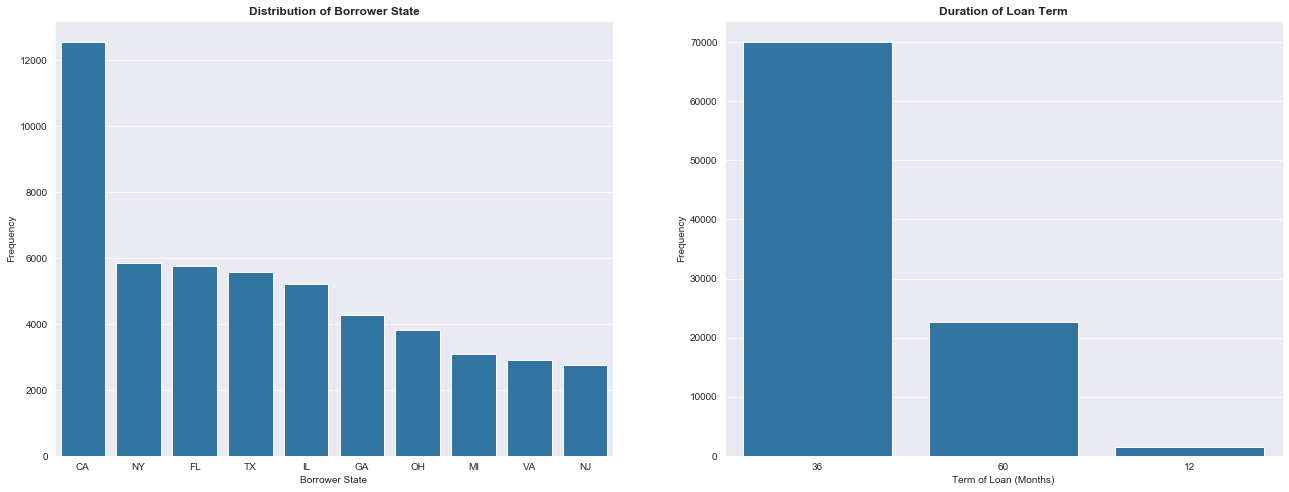

In [27]:
## Bar plot for borrower State and duration of loan term

plt.figure(figsize = [22, 8])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(1, 2, 1)
order = df_clean['borrowerstate'].value_counts().iloc[:10].index
sb.countplot (data=df_clean, x='borrowerstate', color=base_color, order = order)
plt.title('Distribution of Borrower State', weight='bold')
plt.xlabel('Borrower State')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
order = df_clean['term'].value_counts().index
sb.countplot (data=df_clean, x='term', color=base_color, order = order)
plt.title('Duration of Loan Term', weight='bold')
plt.xlabel('Term of Loan (Months)')
plt.ylabel('Frequency')

> Most of the borrowers came from CA, reached at more than 12000 people, and the sum of CA applicants are more than the combination of NY and FL. The majority of loan people applied for 36 month, following by 60 months and 12 months

### How's the distribution of borrower APR, stated monthly income, and revolving credit balance?

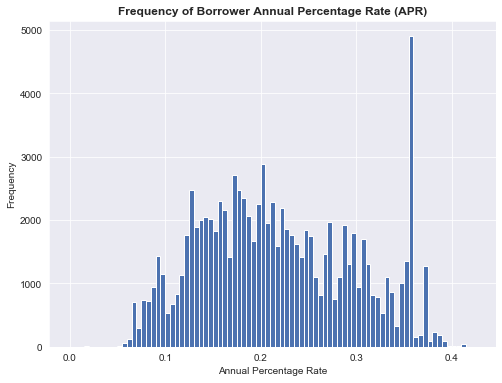

In [28]:
## HISTOGRAM of borrowers' APR ##

bins = np.arange(0, df_clean['borrowerapr'].max()+ 0.005, 0.005)
sb.set_theme({'axes.grid' : True})

plt.figure(figsize=[8, 6])
plt.hist(data=df_clean, x='borrowerapr' , bins = bins)
plt.xlabel('Annual Percentage Rate')
plt.ylabel('Frequency')
plt.title('Frequency of Borrower Annual Percentage Rate (APR)', weight='bold')
sb.set_theme({'axes.grid' : True})
plt.show();

([<matplotlib.axis.XTick at 0x11ae3ad30>,
 <a list of 6 Text xticklabel objects>)

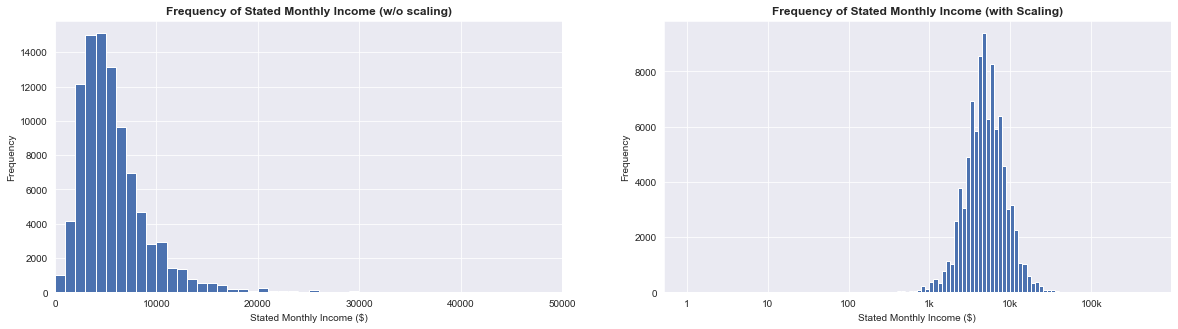

In [29]:
## HISTOGRAM of Stated Monthly Income ##


plt.figure(figsize = [20, 5])
sb.set_theme({'axes.grid' : True})

plt.subplot(1, 2, 1)
bins = np.arange(0, df_clean['statedmonthlyincome'].max() + 1000, 1000)

plt.hist(data=df_clean, x='statedmonthlyincome', bins = bins)
plt.title('Frequency of Stated Monthly Income (w/o scaling)', weight='bold')
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Frequency')
plt.xlim([0,50000])

## HISTOGRAM ON RIGHT: full data with scaling


plt.subplot(1, 2, 2)

log_binsize = 0.05
bins = 10** np.arange(0, np.log10(df_clean['statedmonthlyincome'].max())+ log_binsize, log_binsize)

plt.hist(data = df_clean, x = 'statedmonthlyincome', bins = bins)
plt.xscale('log')
plt.title('Frequency of Stated Monthly Income (with Scaling)', weight='bold')
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Frequency')
plt.xticks([10**0, 10**1, 10**2, 10**3, 10**4, 10**5], [1, '10', '100', '1k', '10k', '100k'])


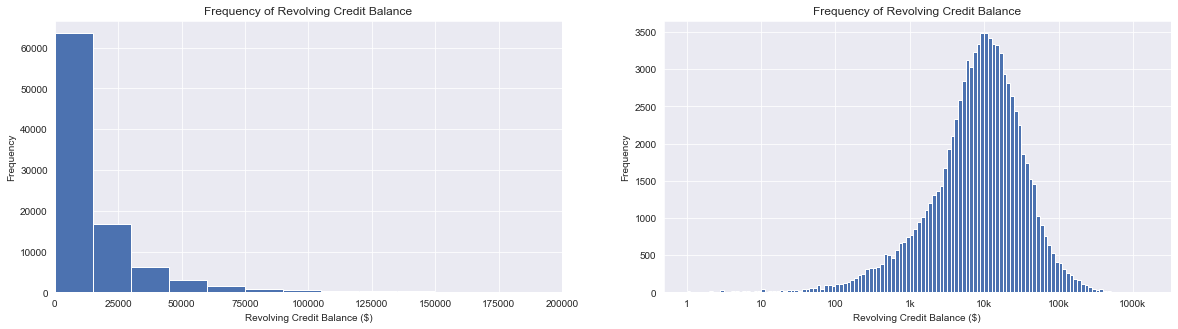

In [30]:
## HISTOGRAM ON LEFT: full data without scaling ## 
# Univariate plot of Revolving Credit Balance

plt.figure(figsize = [20, 5])
sb.set_theme({'axes.grid' : True})

plt.subplot(1, 2, 1)
bin_size = 15000
bins = np.arange(0, df_clean['revolvingcreditbalance'].max()+bin_size, bin_size)

plt.hist(data = df_clean, x = 'revolvingcreditbalance', bins = bins)
plt.xlabel('Revolving Credit Balance ($)')
plt.ylabel('Frequency')
plt.title('Frequency of Revolving Credit Balance')
plt.xlim([0,200000])

## HISTOGRAM ON RIGHT: full data with scaling
# Univariate plot of Revolving Credit Balance by log

plt.subplot(1, 2, 2)
log_binsize = 0.05
bins = 10** np.arange(0, np.log10(df_clean['revolvingcreditbalance'].max())+ log_binsize, log_binsize)

plt.hist(data = df_clean, x = 'revolvingcreditbalance', bins = bins)
plt.xscale('log')
plt.title('Frequency of Revolving Credit Balance')
plt.xlabel('Revolving Credit Balance ($)')
plt.ylabel('Frequency')
plt.xticks([10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6], [1, '10', '100', '1k', '10k', '100k', '1000k']);

> 1. The distribution of borrowers' APR is generally bell-shaped, and clearly a spike at the APR of approximately 35% is observed. As for the histogram of stated monthly income, by putting the limit between 0 and 50000 to exclude the outliers, the distribution is right skewed, and the distribution is somehow normal distributed after it is sacled. the monthly salary of most people is between 1.2K and 12K.
> 2. Similar with the distribution of stated monthly income, the distribution of revolving credit balance is highly right-skewed with a long tail, but the distribution is somehow normal distributed after transformed by log, and the revolving credit blance for most people is between 1K and 100K.


### Q3: How's status of employment and what is the percentage of default?

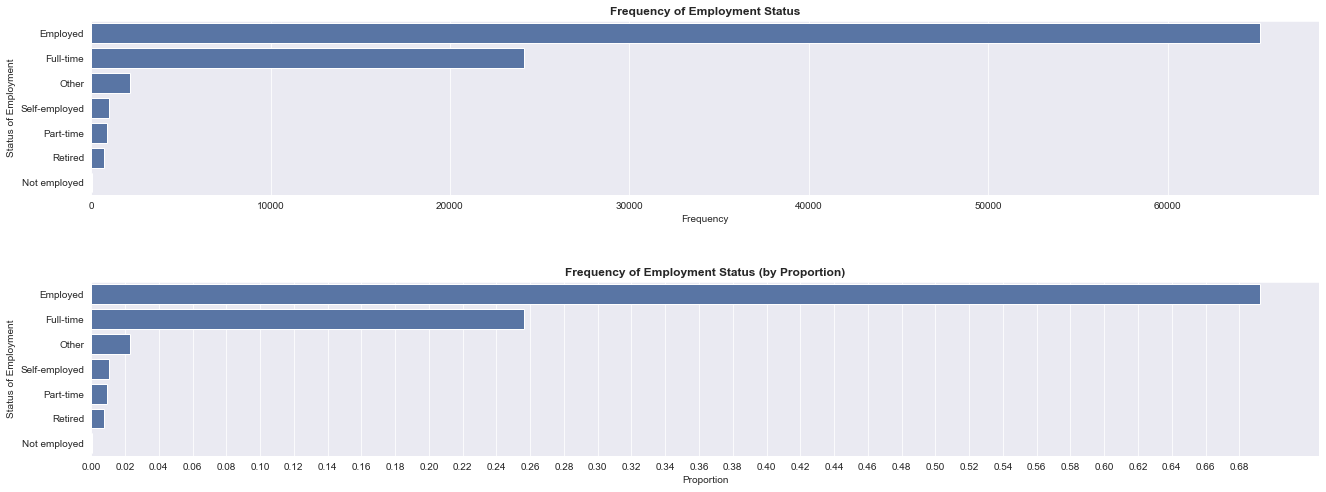

In [31]:
## Bar chart for employment status ##

plt.figure(figsize = [22, 8])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(2, 1, 1)
order = df_clean['employmentstatus'].value_counts().index
sb.countplot (data=df_clean, y='employmentstatus', color=base_color, order = order)
plt.title('Frequency of Employment Status', weight='bold')
plt.ylabel('Status of Employment')
plt.xlabel('Frequency')

plt.subplot(2, 1, 2)
type_counts = df_clean['employmentstatus'].value_counts()
type_order = type_counts.index

n_estatus = df_clean['employmentstatus'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_estatus


tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df_clean, y = 'employmentstatus', color = base_color, order = type_order)
plt.xticks(tick_props * n_estatus, tick_names)
plt.title('Frequency of Employment Status (by Proportion)', weight='bold')
plt.ylabel('Status of Employment')
plt.xlabel('Proportion');

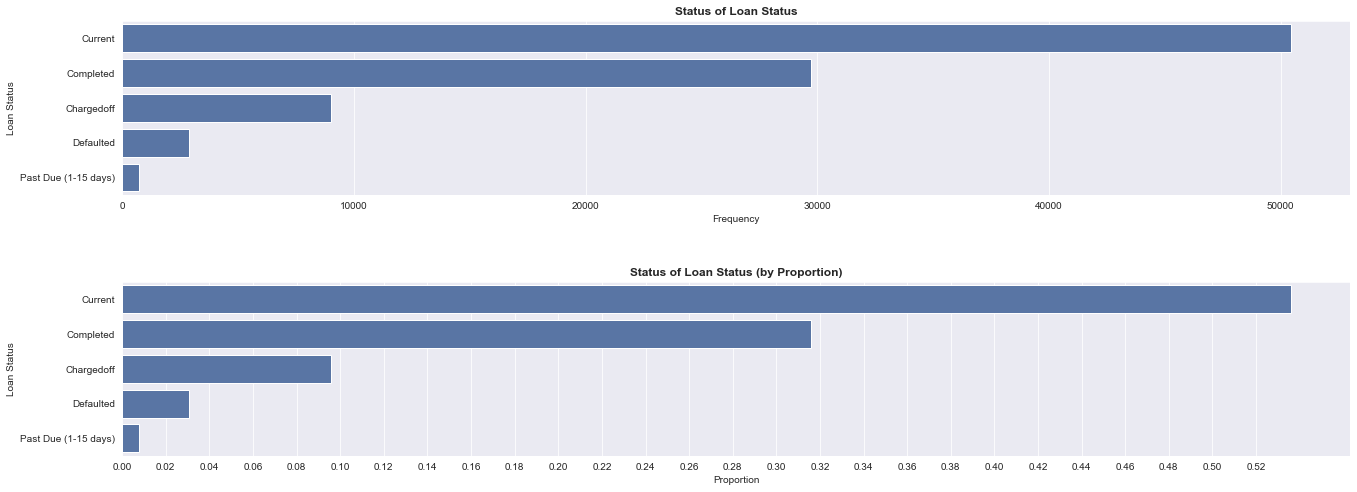

In [32]:
##  Bar plot for loan status ##

plt.figure(figsize = [22, 8])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(2, 1, 1)
order = df_clean['loanstatus'].value_counts().iloc[:5].index
sb.countplot (data=df_clean, y='loanstatus', color=base_color, order = order)
plt.title('Status of Loan Status', weight='bold')
plt.ylabel('Loan Status')
plt.xlabel('Frequency')

plt.subplot(2, 1, 2)
type_counts = df_clean['loanstatus'].value_counts()
type_order = type_counts.iloc[:5].index

# Compute largest proportion

n_lstatus = df_clean['loanstatus'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_lstatus

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df_clean, y = 'loanstatus', color = base_color, order = type_order)
plt.xticks(tick_props * n_lstatus, tick_names)
plt.title('Status of Loan Status (by Proportion)', weight='bold')
plt.ylabel('Loan Status')
plt.xlabel('Proportion');


> 1. Over 68% of the loan applicats are employed, following by 26% of 'Full-time' and less than 1% of 'Part-time'. In my view, the questionnaire 'Employed', 'Full-time', and 'Part-time' are quite ambiguious since both 'Full-time' and 'Part-time' can be categorized as employed.
> 2. Since there are too many categories in this loan status, only top 5 loan status are revealed in the bar chart to avoid confusion. There are 52% on-going loan, whiel the percentage of default reached at 3%.



### Q4: What is the most common reason for people to borrow money, and what's the durationg of the employment for borrowers? 

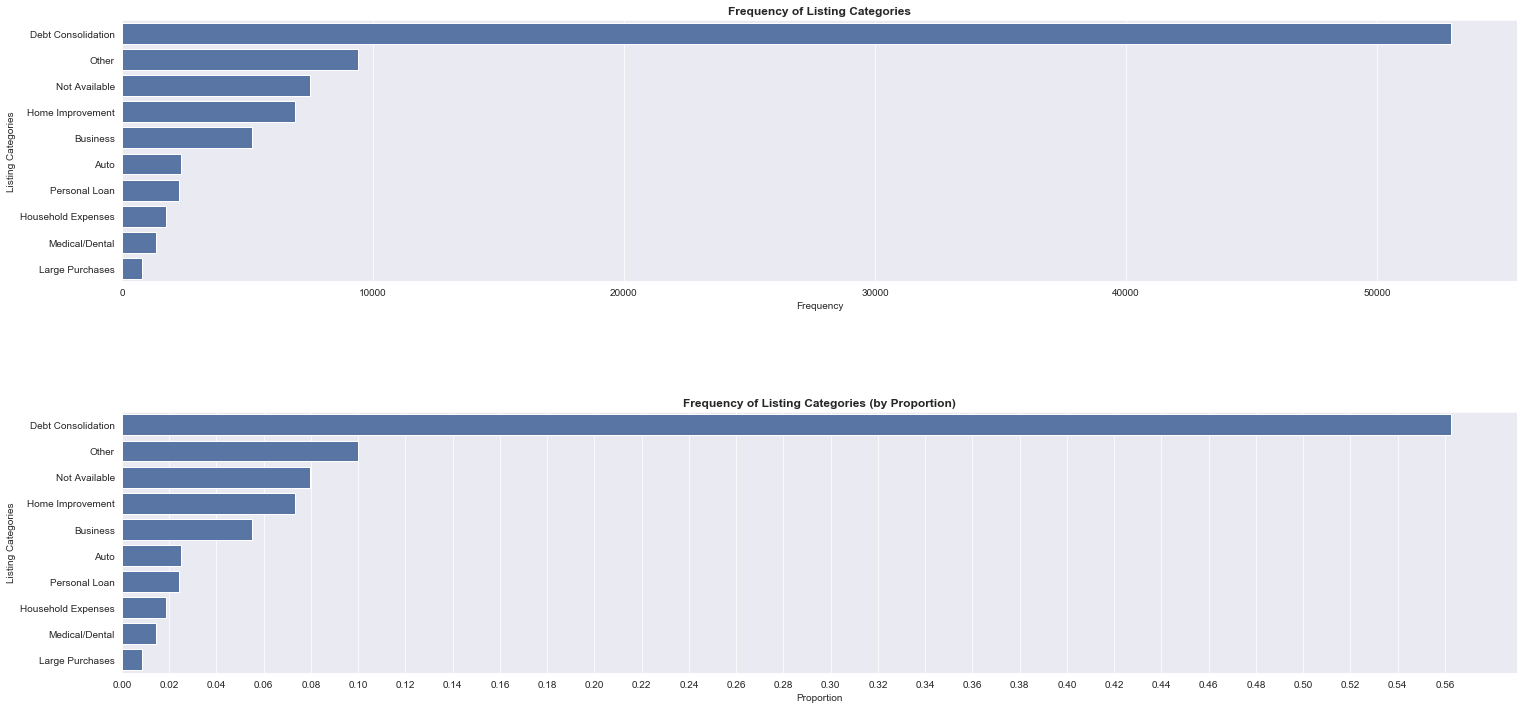

In [33]:
## Bar plot of Listing Categories ##

plt.figure(figsize = [25, 12])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(2, 1, 1)
order = df_clean['listingcategory (numeric)'].value_counts().iloc[:10].index
sb.countplot (data=df_clean, y='listingcategory (numeric)', color=base_color, order = order)
plt.title('Frequency of Listing Categories', weight='bold')
plt.ylabel('Listing Categories')
plt.xlabel('Frequency')

plt.subplot(2, 1, 2)
type_counts = df_clean['listingcategory (numeric)'].value_counts()
type_order = type_counts.iloc[:10].index


# Compute largest proportion

n_lstatus = df_clean['listingcategory (numeric)'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_lstatus
# establish tick locations and create plot

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df_clean, y = 'listingcategory (numeric)', color = base_color, order = type_order)
plt.xticks(tick_props * n_lstatus, tick_names)
plt.title('Frequency of Listing Categories (by Proportion)', weight='bold')
plt.ylabel('Listing Categories')
plt.xlabel('Proportion');

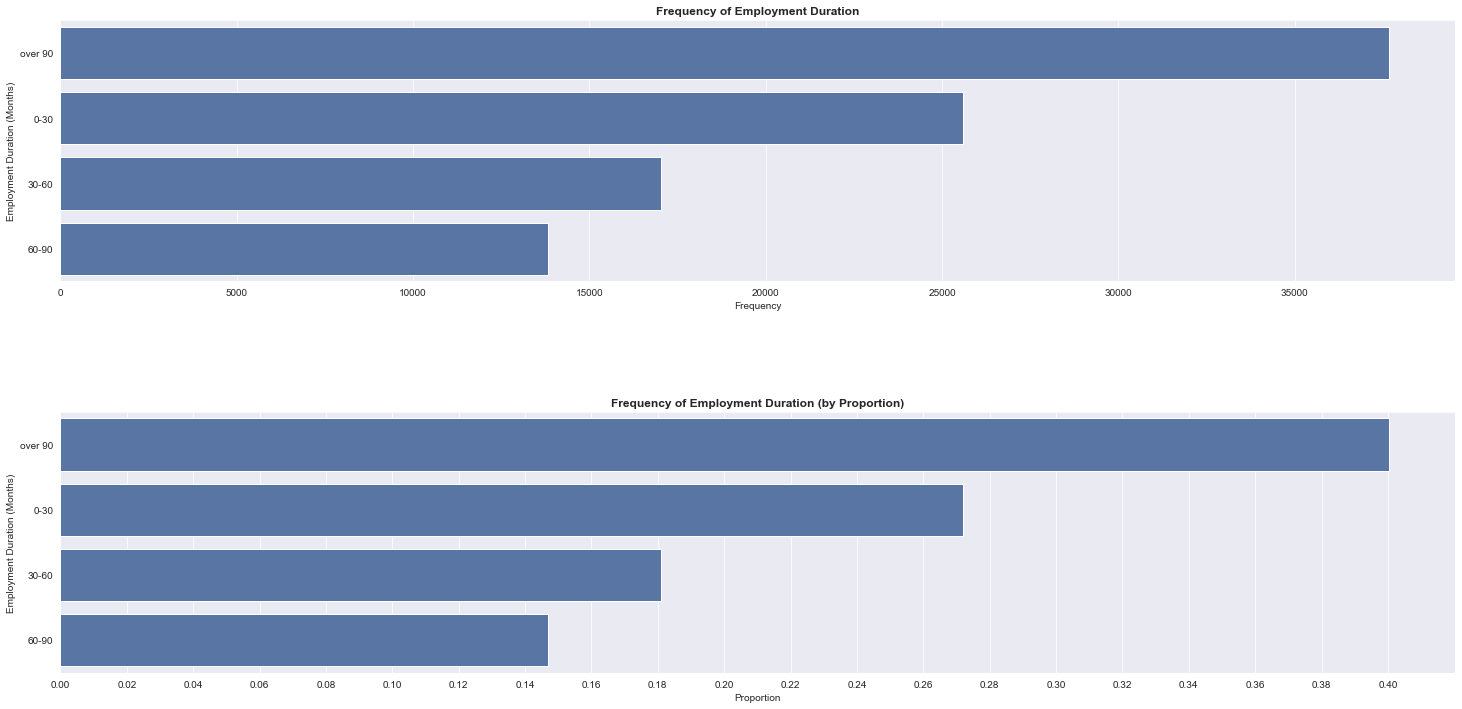

In [34]:
## Bar plot of employtment duartion ##

plt.figure(figsize = [25, 12])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(2, 1, 1)
order = df_clean['employmentstatusduration_levels'].value_counts().index
sb.countplot (data=df_clean, y='employmentstatusduration_levels', color=base_color, order = order)
plt.title('Frequency of Employment Duration', weight='bold')
plt.ylabel('Employment Duration (Months)')
plt.xlabel('Frequency')

plt.subplot(2, 1, 2)
type_counts = df_clean['employmentstatusduration_levels'].value_counts()
type_order = type_counts.index

n_estatus = df_clean['employmentstatusduration_levels'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_estatus

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df_clean, y = 'employmentstatusduration_levels', color = base_color, order = type_order)
plt.xticks(tick_props * n_lstatus, tick_names)
plt.title('Frequency of Employment Duration (by Proportion)', weight='bold')
plt.ylabel('Employment Duration (Months)')
plt.xlabel('Proportion');

> 1. By displaying the top 10 listing of loan, the most popular purpose is debt consolidation, reached at 56%; 8% of usage of loan is not available and 7 % is planed to be used in house rennovation.
> 2. Over 30000 loan applicants (or 40%) has more than 90 months of employment duration. Following by 0-30 months and 30-60 months. People with 60-90 months duration of employment has the least percentage (less than 15%) of all applicants.

### Q5: How much do the loan applicants earn and what do they do for living?

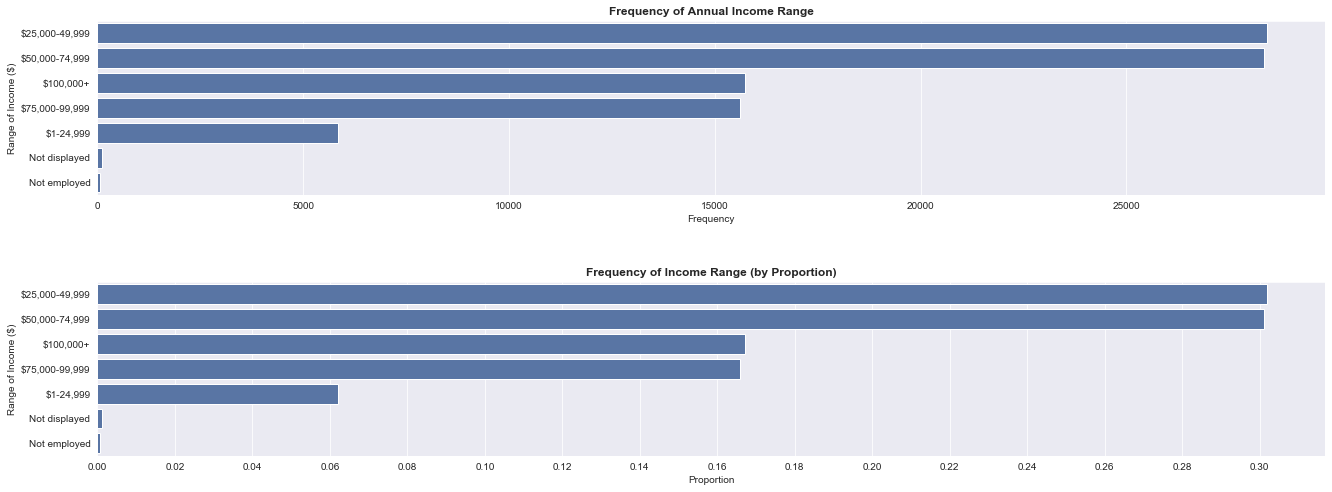

In [35]:
## Bar chart of income range

plt.figure(figsize = [22, 8])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(2, 1, 1)
order = df_clean['incomerange'].value_counts().index
sb.countplot (data=df_clean, y='incomerange', color=base_color, order = order)
plt.title('Frequency of Annual Income Range', weight='bold')
plt.ylabel('Range of Income ($)')
plt.xlabel('Frequency')

plt.subplot(2, 1, 2)
type_counts = df_clean['incomerange'].value_counts()
type_order = type_counts.index

n_istatus = df_clean['incomerange'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_istatus

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df_clean, y = 'incomerange', color = base_color, order = type_order)
plt.xticks(tick_props * n_lstatus, tick_names)
plt.title('Frequency of Income Range (by Proportion)', weight='bold')
plt.ylabel('Range of Income ($)')
plt.xlabel('Proportion');

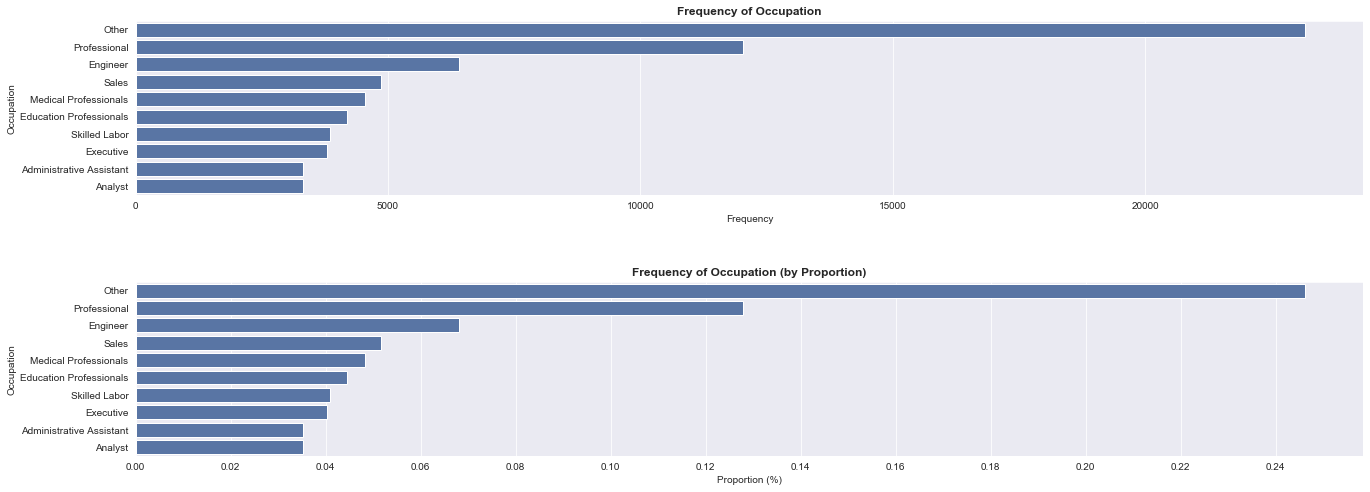

In [36]:
## Bar chart of occupation ##


plt.figure(figsize = [22, 8])
base_color = sb.color_palette()[0]
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})


plt.subplot(2, 1, 1)
order = df_clean['occupation'].value_counts().iloc[:10].index
sb.countplot (data=df_clean, y='occupation', color=base_color, order = order)
plt.title('Frequency of Occupation', weight='bold')
plt.ylabel('Occupation')
plt.xlabel('Frequency')

plt.subplot(2, 1, 2)
type_counts = df_clean['occupation'].value_counts()
type_order = type_counts.iloc[:10].index

# Compute largest proportion
# Returns the sum of all not-null values in `type` column
n_ostatus = df_clean['occupation'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_ostatus
# establish tick locations and create plot

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df_clean, y = 'occupation', color = base_color, order = type_order)
plt.xticks(tick_props * n_lstatus, tick_names)
plt.title('Frequency of Occupation (by Proportion)', weight='bold')
plt.ylabel('Occupation')
plt.xlabel('Proportion (%)');

> 1. There are around 60% of applicants with annual income ranging from 25,000 to 74,999, and borrowers with higher annual income (over 100,000 and 75,000-99,999) contains each approximated 17% accordingly. For those who are in lower income range (1-24,999) is around 6%.
> 2. The questionnaire of occupation is not well categorized. First of all, "Other" occupies the most part of occupation, reaches at over 24% and thus the majority of job category is not so cleared. Also, 'Professional' is too wide-range to describe the occupation of loan applicants. It's better to categorized the occupation by different industries and title, rather than mix them up. In other words, at least one third of occupation does not properly classified.
> 3. Secondly, there are many similar type of occupation with different listing. For example, there are 'sales','tradesman', and 'student' with similar sub-category which makes the category disarrary. Thus, I've integrated similar types of occupation as explained in data wraggling section above. 
> 4. Among the top 10 occupation, besides "Other' and "Professional", most borrowers work as engineer, following by sales, medical and professional professionals. 



### Q6: From the perspective of lender, which month has the most loan application?

In [37]:
df_clean['month'].value_counts().sort_values(ascending=False)

1     8932
10    8601
9     8427
2     8275
12    8187
11    8077
7     8048
8     7651
6     7340
5     7336
3     6651
4     6588
Name: month, dtype: int64

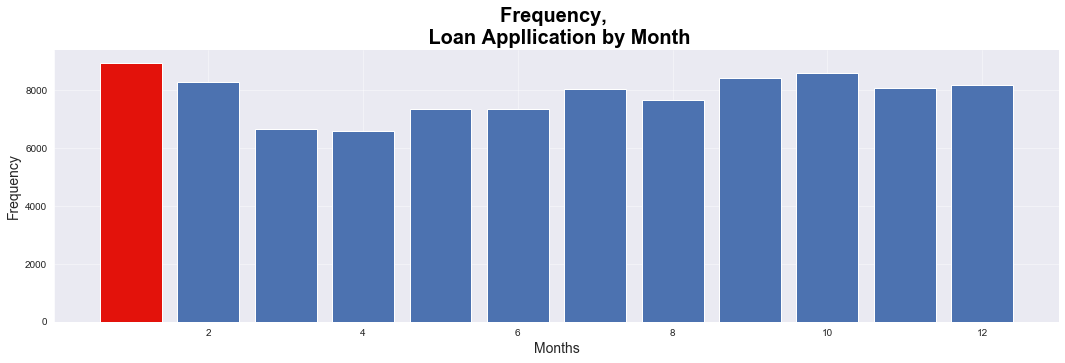

In [38]:
# Plot

loan_month = df_clean['month'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

color = [base_color if val != max(loan_month) else '#e3120b' for val in loan_month]
ax.bar(loan_month.index, loan_month, color=color)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(True, alpha=0.5)
ax.set_xlabel('Months', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Frequency, \n Loan Appllication by Month', color='black', fontsize=20, weight='bold')
plt.show();


> January is the month with the most loan application of the year, reached almost 9000 applications. March and April are the only two months less than 7000 applications.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1. Dispite a spike is revealed, the distribution of borrowers' APR is relatively bell-shaped. On the other hand, the distributions of stated monthly income and revoling credit balance are right skewed, and both charts reveals outliers on their right tail. After making logarithmic transformation and excluding the outliers, the shapes become relatively normal distributed.
> 2. CA is the state with the most loan applications, and most of the loan is made by 36 month. I am curious whether would the APR or the possibility of defaulted be by different regions, and will investigate in further analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Among the bar charts of loan status, listing categories, duration of employment, and occupation, few changes are made as listed below.
> 1. Loan status and listing categories: there are too many categories in these factors, in order to avoid confusion, only top 5 loan status and top 10 listing categories are revealed. Otherwise, the visualization of detail is very messy.
> 2. Duration of employment: the employment duration is cut by different duration levels to reveal to more clear picture
> 3. Occupation: there are too many similar types of occupation, such as "Sales - Retail', and 'Sales - Commission'. The similarity of different occupation is integrated into a single type of job category. The examples mentioned above is transformed as "Sales", and "Judge" and "Attorney" are classified as "Law Professional". By simplifing the occupation, the visualization would be easier and more clear.



## Bivariate Exploration

### Q7: Which characters would impact the APR of borrowers?

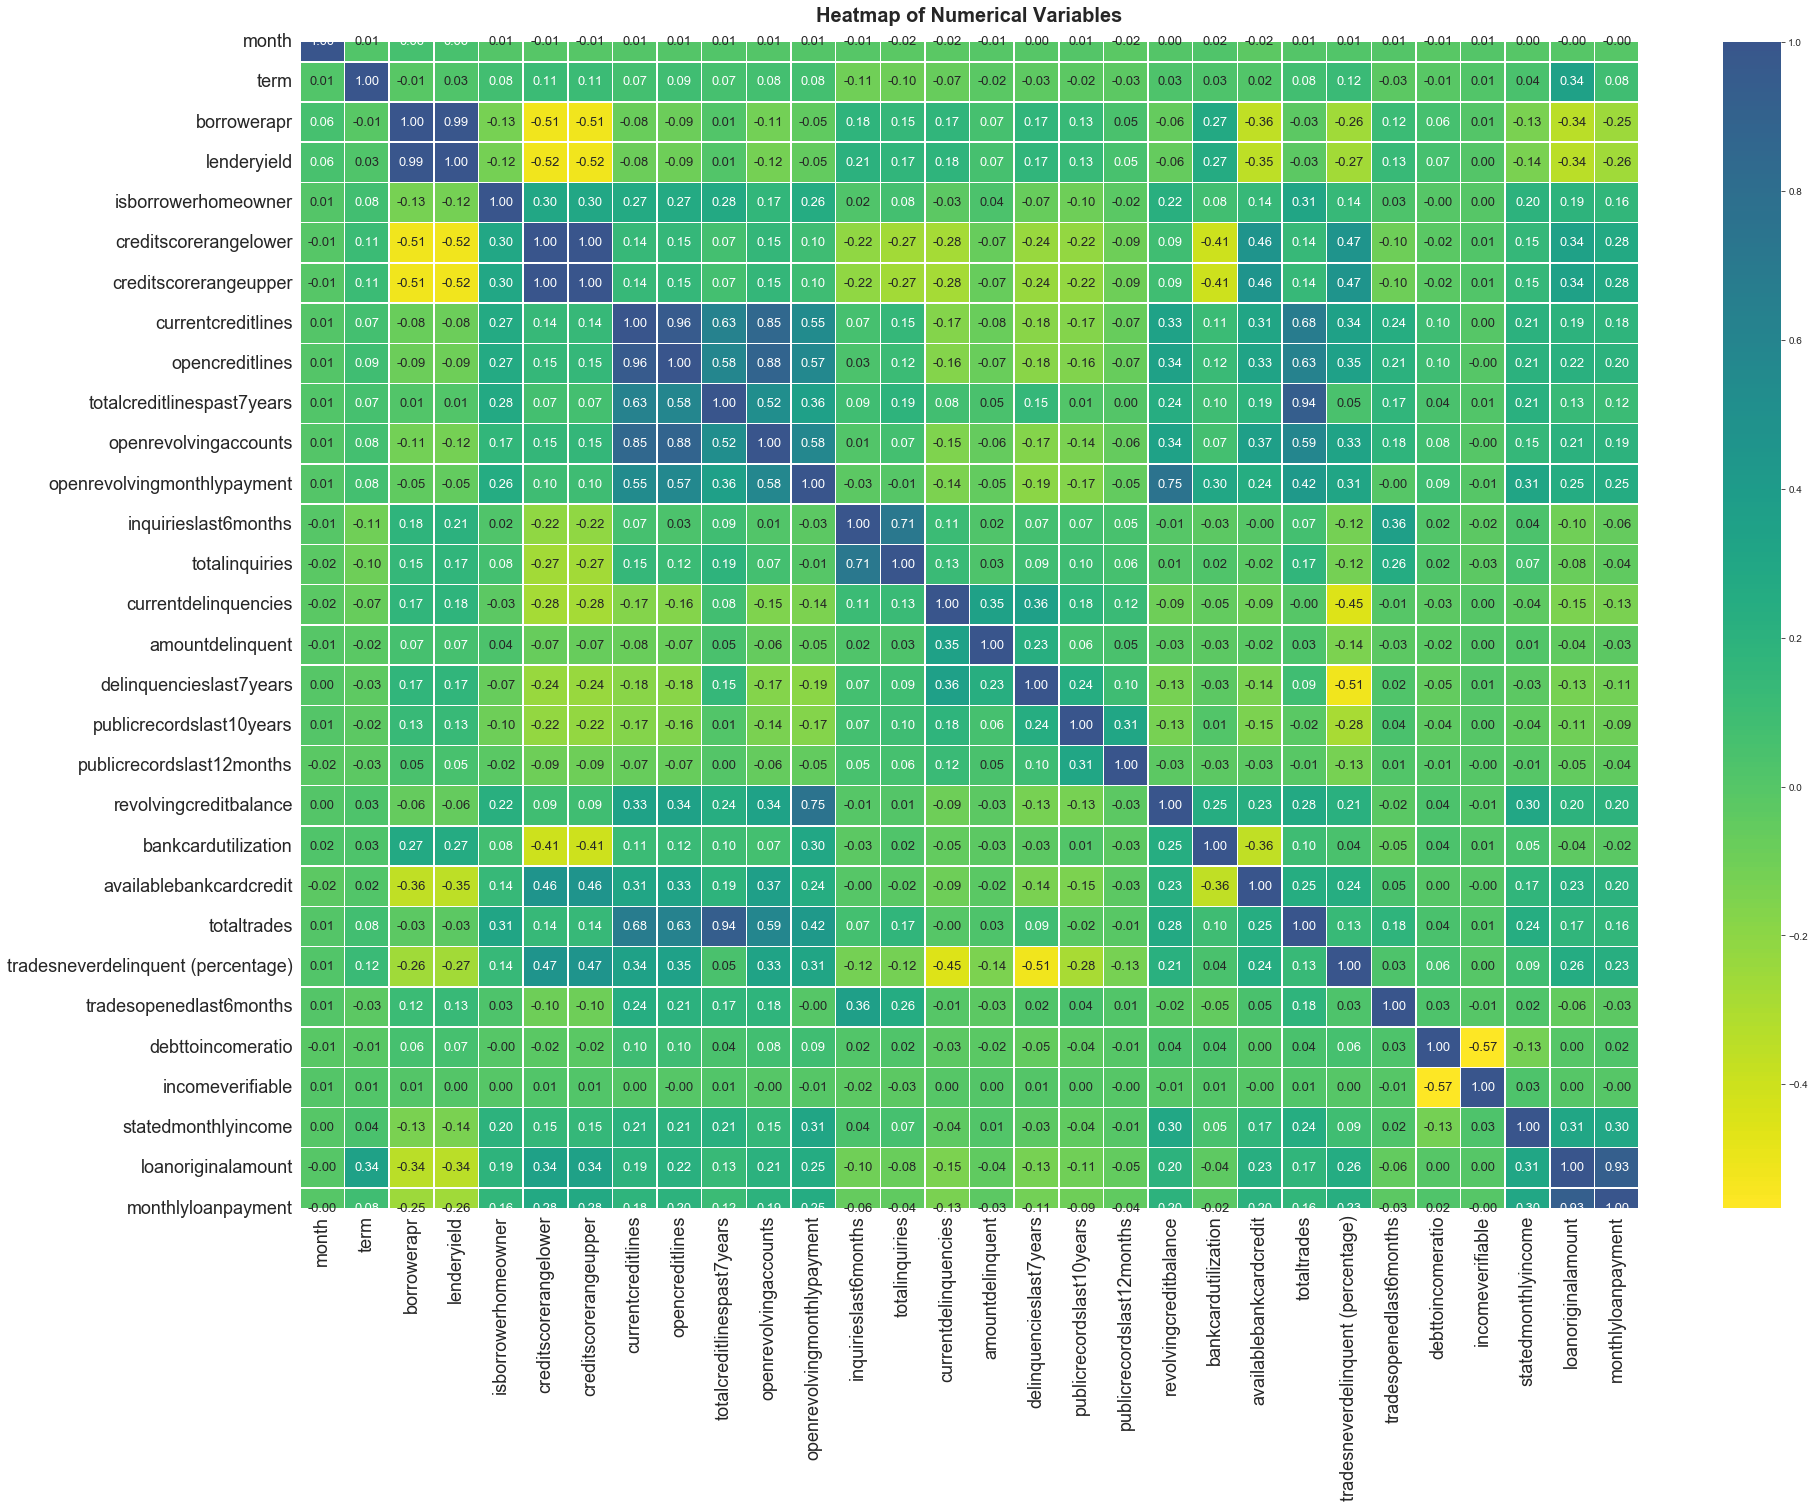

In [39]:
# Plot Heatmap for all numerical variables
# Overview of correlation among variables and APR

plt.figure(figsize=(30,24))
plt.subplots_adjust(top=0.8) 
sb.heatmap(df_clean.corr(), annot=True, cmap='viridis_r', fmt='.2f', linewidths=0.5, 
           center=0.5, annot_kws = {'fontsize':13})

plt.title ('Heatmap of Numerical Variables', weight='bold', size=20, pad=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show();

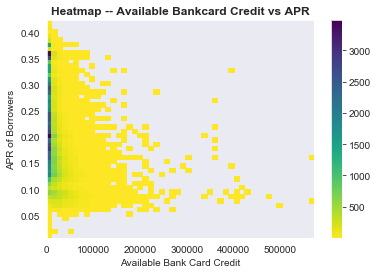

In [40]:
# Heatmap -- 'availablebankcardcredit' vs 'borrowerapr' is negative correlated

plt.hist2d(data = df_clean, x = 'availablebankcardcredit', y = 'borrowerapr', cmin=0.5, cmap='viridis_r', 
          bins = (50, 50))
plt.colorbar()
plt.title('Heatmap -- Available Bankcard Credit vs APR', weight='bold')
plt.xlabel('Available Bank Card Credit')
plt.ylabel('APR of Borrowers');


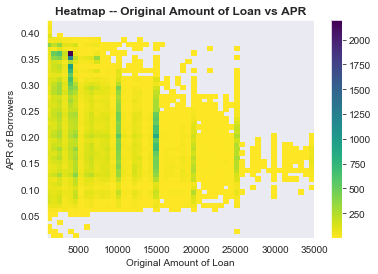

In [41]:
# Heatmap -- 'loanoriginalamount' vs 'borrowerapr' is negative correlated

plt.hist2d(data = df_clean, x = 'loanoriginalamount', y = 'borrowerapr', cmin=0.5, cmap='viridis_r', 
          bins = (50, 50))
plt.colorbar()
plt.title('Heatmap -- Original Amount of Loan vs APR', weight='bold')
plt.xlabel('Original Amount of Loan')
plt.ylabel('APR of Borrowers');

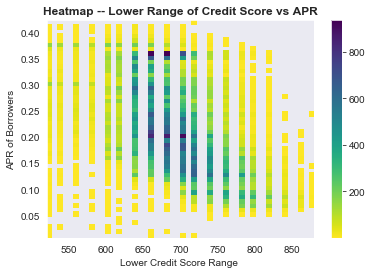

In [42]:
plt.hist2d(data = df_clean, x = 'creditscorerangelower', y = 'borrowerapr', cmin=0.5, cmap='viridis_r', 
          bins = (50, 50))
plt.colorbar()
plt.title('Heatmap -- Lower Range of Credit Score vs APR', weight='bold')
plt.xlabel('Lower Credit Score Range ')
plt.ylabel('APR of Borrowers');

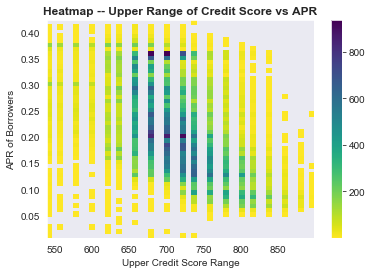

In [43]:
plt.hist2d(data = df_clean, x = 'creditscorerangeupper', y = 'borrowerapr', cmin=0.5, cmap='viridis_r', 
          bins = (50, 50))
plt.colorbar()
plt.title('Heatmap -- Upper Range of Credit Score vs APR', weight='bold')
plt.xlabel('Upper Credit Score Range')
plt.ylabel('APR of Borrowers');

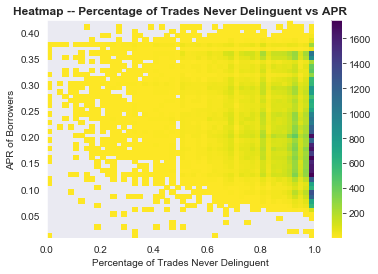

In [44]:
# Heatmap -- 'tradesneverdelinquent (percentage)' vs 'borrowerapr' is negative correlated

plt.hist2d(data = df_clean, x = 'tradesneverdelinquent (percentage)', y = 'borrowerapr', cmin=0.5, cmap='viridis_r', 
          bins = (50, 50))
plt.colorbar()
plt.title('Heatmap -- Percentage of Trades Never Delinguent vs APR', weight='bold')
plt.xlabel('Percentage of Trades Never Delinguent')
plt.ylabel('APR of Borrowers');


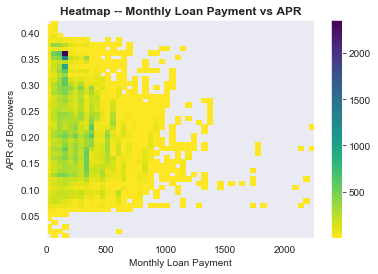

In [45]:
# Heatmap -- 'monthlyloanpayment' vs 'borrowerapr' is negative correlated

plt.hist2d(data = df_clean, x = 'monthlyloanpayment', y = 'borrowerapr', cmin=0.5, cmap='viridis_r', 
          bins = (50, 50))
plt.colorbar()
plt.title('Heatmap -- Monthly Loan Payment vs APR', weight='bold')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('APR of Borrowers');


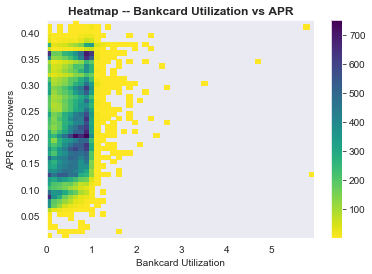

In [46]:
# Heatmap -- 'bankcardutilization' vs 'borrowerapr' is positive correlated 

plt.hist2d(data = df_clean, x = 'bankcardutilization', y = 'borrowerapr', cmin=0.5, cmap='viridis_r', 
          bins = (50, 50))
plt.colorbar()
plt.title('Heatmap -- Bankcard Utilization vs APR', weight='bold')
plt.xlabel('Bankcard Utilization')
plt.ylabel('APR of Borrowers');

> 1. Among numerical factors, the upper and lower range of credit score have the strongest negative correlation with borrowers' APR. That is, the higher the credit score range, the lower the loan cost for borrowers.
> 2. Several negative correlated factors are observed, including available bankcard credit, the orginal amount of loan, the percentage of trades never delingquent, and monthly loan payment.
> 3. Compared to other numerical variables, the utilization of bankcard is relatively positive correlated with borrower annual percentage rate. It is regarded as more risky for lender if borrowers utilize the higher amount of bankcard credit.

### Q8: Regarding to categorical variables, what type of borrower would have higher APR?

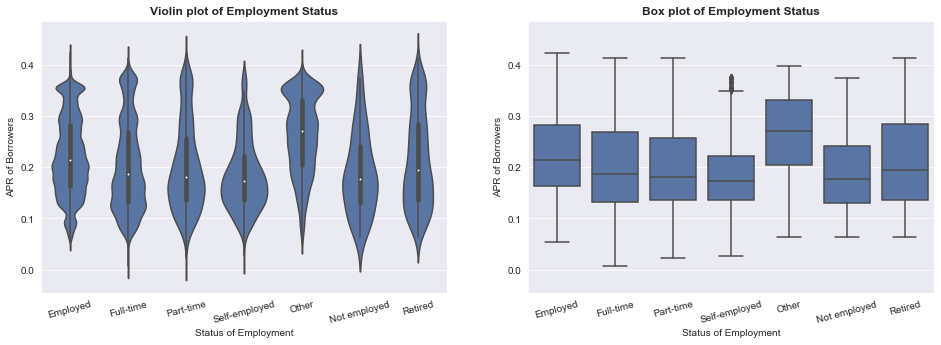

In [47]:
# Replationship between employment status and APR by violin and box plot

estatus_classes = ['Employed', 'Full-time', 'Part-time', 'Self-employed' ,'Other', 'Not employed','Retired']

eclasses = pd.api.types.CategoricalDtype(ordered=True, categories=estatus_classes)

df_clean['employmentstatus'] = df_clean['employmentstatus'].astype(eclasses);

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df_clean, x='employmentstatus', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Violin plot of Employment Status', weight='bold')
plt.xlabel('Status of Employment')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='employmentstatus', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Box plot of Employment Status', weight='bold')
plt.xlabel('Status of Employment')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

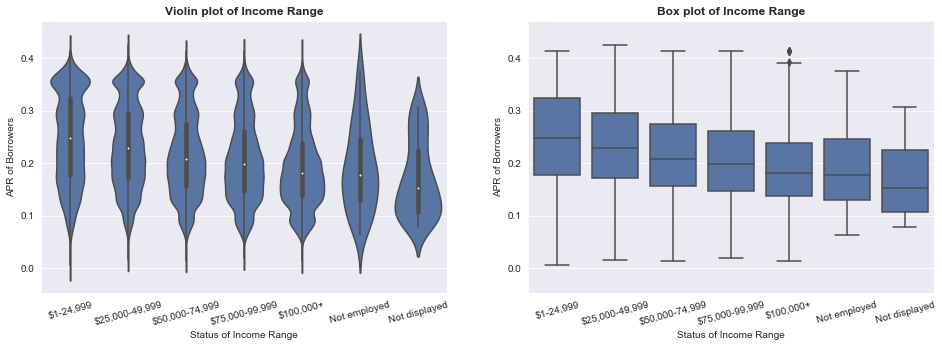

In [48]:
# Replationship between Income range and APR by violin and box plot

istatus_classes = ['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+',
                   'Not employed' ,'Not displayed']

iclasses = pd.api.types.CategoricalDtype(ordered=True, categories=istatus_classes)

df_clean['incomerange'] = df_clean['incomerange'].astype(iclasses)

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df_clean, x='incomerange', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Violin plot of Income Range', weight='bold')
plt.xlabel('Status of Income Range')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='incomerange', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Box plot of Income Range', weight='bold')
plt.xlabel('Status of Income Range')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

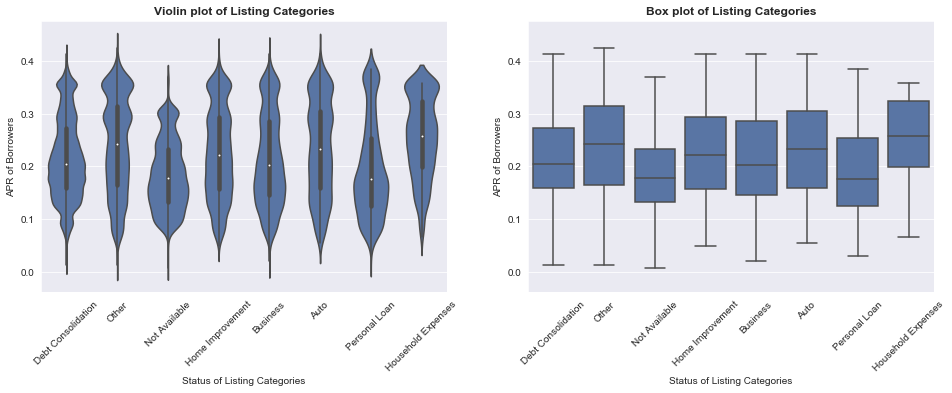

In [49]:
# Replationship between listing categories and APR by violin and box plot

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
order = df_clean['listingcategory (numeric)'].value_counts().iloc[:8].index
ax1 = sb.violinplot(data=df_clean, x='listingcategory (numeric)', y='borrowerapr', color=base_color, order=order)
plt.xticks(rotation=45)
plt.title('Violin plot of Listing Categories', weight='bold')
plt.xlabel('Status of Listing Categories')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='listingcategory (numeric)', y='borrowerapr', color=base_color, order=order)
plt.xticks(rotation=45)
plt.title('Box plot of Listing Categories', weight='bold')
plt.xlabel('Status of Listing Categories')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

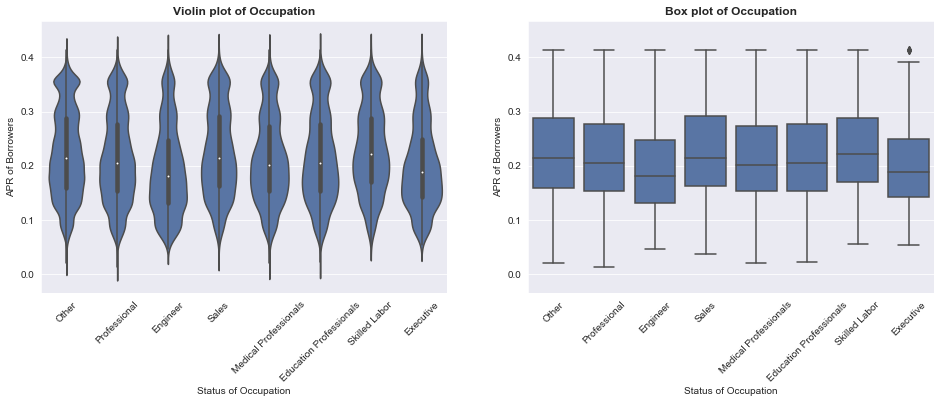

In [50]:
# Replationship between occupation and APR by violin and box plot

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
order = df_clean['occupation'].value_counts().iloc[:8].index
ax1 = sb.violinplot(data=df_clean, x='occupation', y='borrowerapr', color=base_color, order=order)
plt.xticks(rotation=45)
plt.title('Violin plot of Occupation', weight='bold')
plt.xlabel('Status of Occupation')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='occupation', y='borrowerapr', color=base_color, order=order)
plt.xticks(rotation=45)
plt.title('Box plot of Occupation', weight='bold')
plt.xlabel('Status of Occupation')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

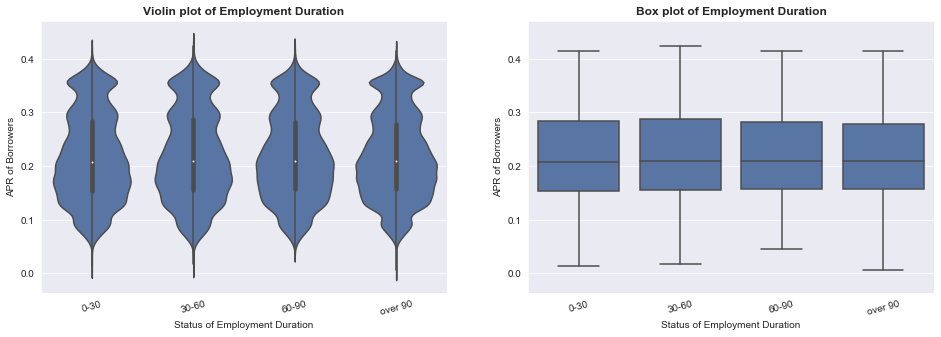

In [51]:
# Replationship between employment duration and APR by violin and box plot

estatus_classes = ['0-30','30-60','60-90','over 90']

eclasses = pd.api.types.CategoricalDtype(ordered=True, categories=estatus_classes)

df_clean['employmentstatusduration_levels'] = df_clean['employmentstatusduration_levels'].astype(eclasses)

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df_clean, x='employmentstatusduration_levels', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Violin plot of Employment Duration', weight='bold')
plt.xlabel('Status of Employment Duration')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='employmentstatusduration_levels', y='borrowerapr', color=base_color)
plt.xticks(rotation=15)
plt.title('Box plot of Employment Duration', weight='bold')
plt.xlabel('Status of Employment Duration')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

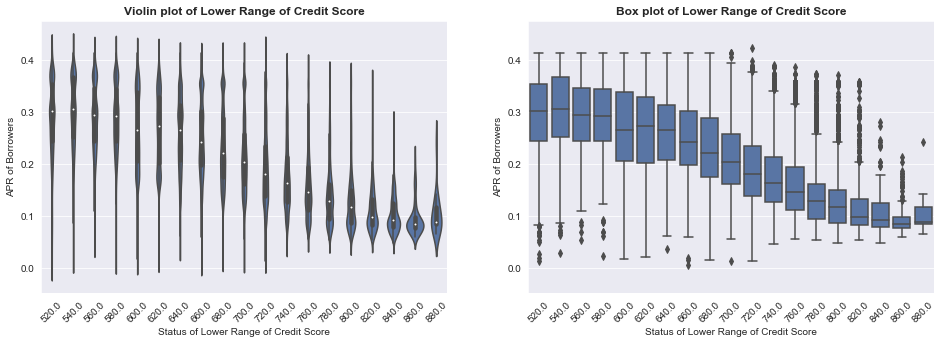

In [52]:
# Replationship between lower range of credit score and APR by violin and box plot

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df_clean, x='creditscorerangelower', y='borrowerapr', color=base_color)
plt.xticks(rotation=45)
plt.title('Violin plot of Lower Range of Credit Score', weight='bold')
plt.xlabel('Status of Lower Range of Credit Score')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='creditscorerangelower', y='borrowerapr', color=base_color)
plt.xticks(rotation=45)
plt.title('Box plot of Lower Range of Credit Score', weight='bold')
plt.xlabel('Status of Lower Range of Credit Score')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

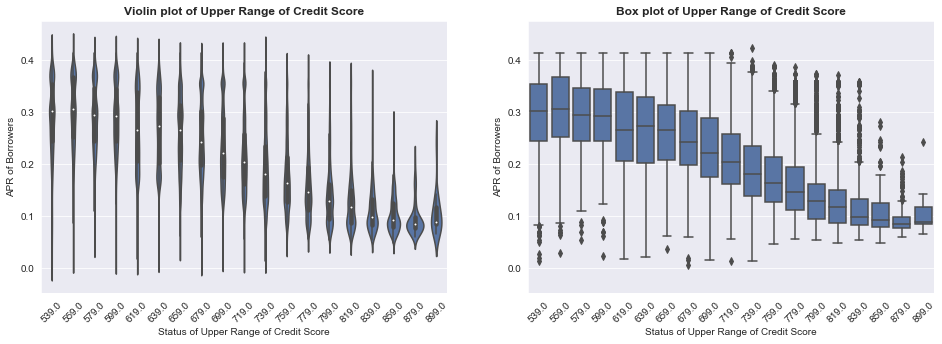

In [53]:
# Replationship between higher range of credit score and APR by violin and box plot

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=df_clean, x='creditscorerangeupper', y='borrowerapr', color=base_color)
plt.xticks(rotation=45)
plt.title('Violin plot of Upper Range of Credit Score', weight='bold')
plt.xlabel('Status of Upper Range of Credit Score')
plt.ylabel('APR of Borrowers');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='creditscorerangeupper', y='borrowerapr', color=base_color)
plt.xticks(rotation=45)
plt.title('Box plot of Upper Range of Credit Score', weight='bold')
plt.xlabel('Status of Upper Range of Credit Score')
plt.ylabel('APR of Borrowers')
plt.ylim(ax1.get_ylim());

> 1. People with employment status in "Other" have the highest average APR while those who have full-time, part-time job, not-employed and self-employed have similar level of APR. Furthermore, it's interesting to observe that people who are employed and retired have higher average APR than not-employed.

> 2. Regarding to the income range, the trend in general can be observed that the higher the annual salary, the lower the average APR. Surprisingly, for those who are not employed have the same level of APR as people with hieghest annual income.

> 3. Among the top 8 listing categories, the loan purpose for houshold expense has the highest average APR while personal loan has the least. 

> 4. People who work as engineer and executive have the least average APR, and the rest occupation have the similar APR level. However, no clear difference and trend is discovered among 4 employment duration levels


### Q9: Which state has the highest APR? And which state has the lowest APR and defaulted rate?

In [54]:
# Extract highest APR from regions
high_apr = df_clean.groupby('borrowerstate')['borrowerapr'].mean().sort_values(ascending=False).round(4).head(10)

# Extract lowest APR from regions
low_apr = df_clean.groupby('borrowerstate')['borrowerapr'].mean().sort_values(ascending=True).round(4).head(10)

# Query Complated and Defualted from loan status
df_clean_filter = df_clean[(df_clean['loanstatus'].isin(['Completed','Defaulted']))]

# List the lowest default rate regions
low_default = df_clean_filter.groupby('borrowerstate')['loanstatus'].value_counts(normalize=True).mul(100).nsmallest(10).round(2)
print ('States with highest APR')
print (high_apr)
print ('=========================')
print ('States with highest APR')
print (low_apr)
print ('=========================')
print ('The average APR of all states')
print (df_clean['borrowerapr'].mean())
print ('=========================')
print ('The lowest default rate of all states')
print (low_default)

States with highest APR
borrowerstate
AR    0.2370
AL    0.2369
SD    0.2368
MS    0.2357
NV    0.2310
KY    0.2298
ND    0.2291
TN    0.2283
PA    0.2281
MO    0.2280
Name: borrowerapr, dtype: float64
States with highest APR
borrowerstate
ME    0.1754
IA    0.1782
DC    0.2012
AK    0.2070
CO    0.2092
MA    0.2092
VT    0.2118
WA    0.2121
DE    0.2122
WI    0.2128
Name: borrowerapr, dtype: float64
The average APR of all states
0.21833496477634567
The lowest default rate of all states
borrowerstate  loanstatus
SC             Defaulted     2.63
HI             Defaulted     3.96
DC             Defaulted     4.26
AK             Defaulted     4.35
NY             Defaulted     5.06
ME             Defaulted     5.36
TX             Defaulted     5.56
AR             Defaulted     5.85
MA             Defaulted     5.89
KY             Defaulted     5.95
Name: loanstatus, dtype: float64


<Figure size 432x288 with 0 Axes>

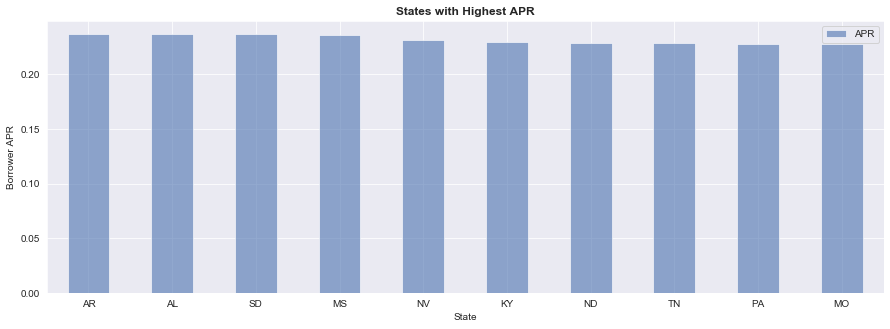

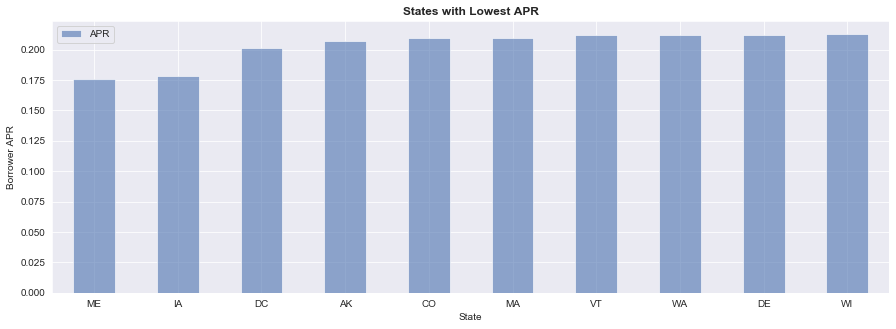

In [55]:
#Plot -- States with highest APR

plt.subplots_adjust(hspace=0.5)

df_high_apr_state= pd.DataFrame(df_clean.groupby('borrowerstate')['borrowerapr'].mean().sort_values(ascending=False).round(4).head(10))
df_high_apr_state['borrowerstate'] = df_high_apr_state.index

df_high_apr_state.plot.bar(x="borrowerstate", y='borrowerapr',title="States with Highest APR",
                       color = base_color, alpha=0.6, figsize=[15,5])
plt.title('States with Highest APR', weight='bold')
plt.xlabel('State')
plt.ylabel('Borrower APR')
plt.xticks(rotation=360)
plt.legend(['APR'], loc=0)
plt.show()

# Plot -- States with lowest APR

df_low_apr_state= pd.DataFrame(df_clean.groupby('borrowerstate')['borrowerapr'].mean().sort_values(ascending=True).round(4).head(10))
df_low_apr_state['borrowerstate'] = df_low_apr_state.index

df_low_apr_state.plot.bar(x="borrowerstate", y='borrowerapr',
                       color = base_color, alpha=0.6, figsize=[15,5])
plt.title('States with Lowest APR', weight='bold')
plt.xlabel('State')
plt.ylabel('Borrower APR')
plt.xticks(rotation=360)
plt.legend(['APR'], loc=0)
plt.show();

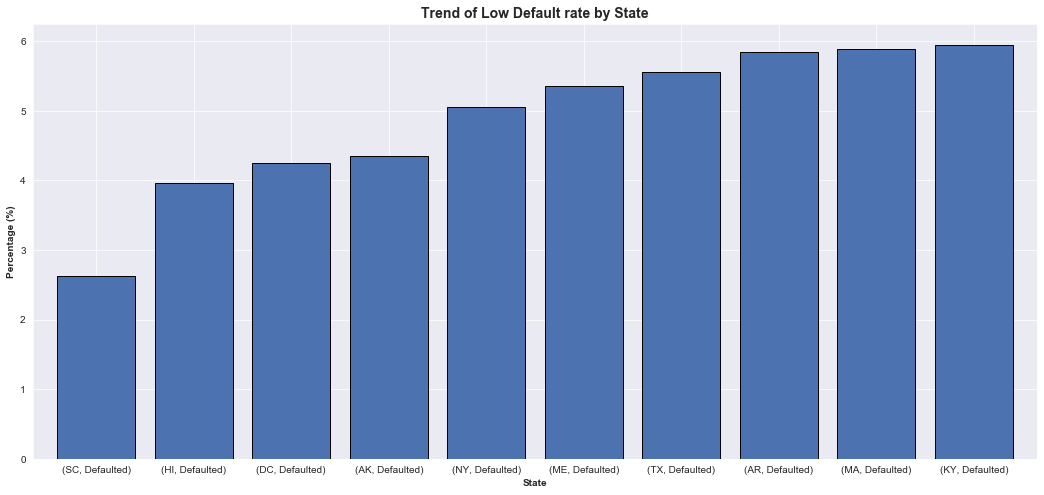

In [56]:
# Extract Completed and Defaulted from the dataframe

df_clean_filter = df_clean[(df_clean['loanstatus'].isin(['Completed','Defaulted']))]

def myValueCountPlot (df_clean_filter, xVar, yVar='loanstatus', cols ='Defaulted', normalize=True, mul=100):
    df_clean_filter.groupby(xVar)[yVar].value_counts(normalize=normalize).mul(mul).nsmallest(10).plot.bar(edgecolor='black', figsize=[18,8],rot=0, width=0.8)
    
    # Add title and format it
    plt.title('Trend of Low Default rate by State', fontsize=14, weight='bold')
    
    # Add xlabel and format it
    plt.xlabel ('State', fontsize=10, weight='bold')
    
    # Add ylabel and format it
    plt.ylabel (f'{"Percentage (%)" if normalize else "Frequency"}'.title(), fontsize=10, weight= 'bold')

myValueCountPlot (df_clean_filter, 'borrowerstate')


> 1. AR, AL, and SD are the states with the highest APR, reaching at 23.7%, 23.69%, and 23.68% accordingly. Compared to the average APR of all states, these states are approximately 2% higher than average.
> 2. On the contrary, ME, IA, and DC are the regions with lowest APR, reaching only at 17.54%, 17.82%, and 20.82%
> 3. SC by far is the state with lowest defaulted rate, reached at merely 2.63%. Followed by HI, DC and AK, where the defaulted rate is around 4%.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The haeatmap above reveals the correlation among variables between borrowers' annual percentage rate (APR). The ranges of credit scores have the strongest negative correlation with borrowers' APR, following by available bankcard credit, origin amount of loan, monthly loan payment, and percentage of trades that never delinguent. Interestingly, the borrower would have lower loan cost with the higher amount of original loan. Also, the higher the monthly loan payment, the higher chance would the APR be reduced. 

> One relatively postive correlated factor is observed. Bankcard utilization implies how would the loan applicants rely on the credit amount of bankcards. In other words, the banks would regard suffering greater risk to offer the loan to those who have higher bankcard utilization and thus the APR would be higher.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1. The difference of APR level among employment duration levels and state of borrowers is not clear. 

> 2. It makes sense to me that people with higher annual income would have lower level of APR; however, it's counter tuitive to see peopple who are not employed enjoy the same APR level as those who have the highest annual income (over $10,000). 

> 3. Employment status might not be a ritical factors impacting APR since there is no clear trends can be made by various employment status. For example, people who are out of work enjoy the lower APR level than those who are employed, which does not make sense to me.


## Multivariate Exploration

### Q10: Is owning a property advantegeous to have a better annual percentage rate of a loan?

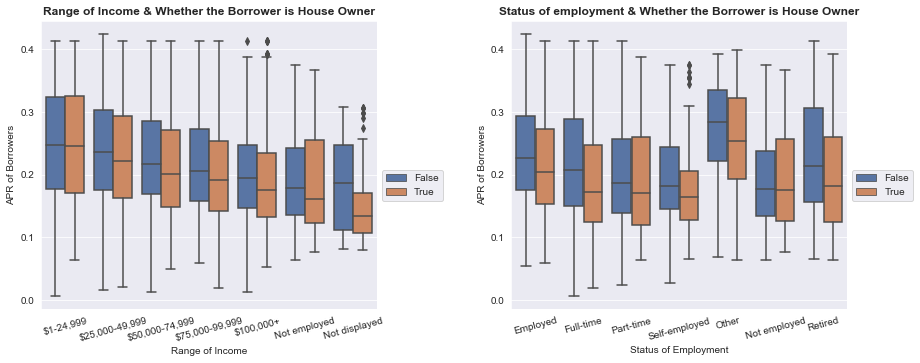

In [57]:

# Box Plot to reveal the relationshipt among APR and whether borrower is house owner, different employment status, and income range

plt.figure(figsize = [14, 5])
sb.set_theme({'axes.grid' : True})
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# Box plot -- income range, borrower apr, house owner
plt.subplot(1, 2, 1)
sb.boxplot(data = df_clean, x = 'incomerange', y = 'borrowerapr', hue = 'isborrowerhomeowner')
plt.legend(loc = 'best', bbox_to_anchor = (1.0, 0.5)) 
plt.xticks(rotation = 15)
plt.title('Range of Income & Whether the Borrower is House Owner', weight='bold')
plt.xlabel('Range of Income')
plt.ylabel('APR of Borrowers')

# Box plot -- employment status, borrower apr, house owner
plt.subplot(1, 2, 2)
sb.boxplot(data = df_clean, x = 'employmentstatus', y = 'borrowerapr', hue = 'isborrowerhomeowner')
plt.legend(loc = 'best', bbox_to_anchor = (1.0, 0.5)) 
plt.xticks(rotation = 15)
plt.title('Status of employment & Whether the Borrower is House Owner', weight='bold')
plt.xlabel('Status of Employment')
plt.ylabel('APR of Borrowers');

> 1. Yes, owning a property is quite helpful to strive for better condition of APR. Obviously, in the box plot on right, in all employment status, the average APR for people owning a property is lower than those who do not, unless the loan applicants are not employed. No obvious lower APR is observed if borrower is out of a job, eventhough he/she owns a house.
> 2. Regarding to the various ranges of income, a clear trend of gradually decreased APR for house owner can be seen in the box plot on left. Interestingly, borrowers owning a house but not employed enjoy better condition of APR, which is contradicted by the observation above; moreover, for loan appoicants with the lowest salary range, having a property does not encourage lender to offer a better condition.


### Q11: Compared to the regions with higher APR, what's the relationship for those who are defaulted in the regions with lower borrower APR between APR and stated monthly income？

In [58]:
# Filter loan status as "Completed" and "Defaulted" in HIGH APR states

df_filter_high = df_clean[(df_clean['loanstatus'].isin(['Completed','Defaulted'])) & 
                     (df_clean['borrowerstate'].isin(['AR','AL','SD','MS','NV','KY','ND','TN','PA','MO']))]

# Filter loan status as "Completed" and "Defaulted" in LOW APR states

df_filter_low = df_clean[(df_clean['loanstatus'].isin(['Completed','Defaulted'])) & 
                     (df_clean['borrowerstate'].isin(['ME','IA','DC','AK','CO','MA','VT','WA','DE','WI']))]

In [ ]:

# Box Plot to reveal the relationshipt among APR and whether borrower is house owner, different employment status, and income range

plt.figure(figsize = [14, 5])
sb.set_theme({'axes.grid' : True})
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# Box plot -- income range, borrower apr, house owner
plt.subplot(1, 2, 1)
g = sb.FacetGrid(data=df_filter_high, hue='loanstatus', height = 6)

sb.boxplot(data = df_clean, x = 'incomerange', y = 'borrowerapr', hue = 'isborrowerhomeowner')
plt.legend(loc = 'best', bbox_to_anchor = (1.0, 0.5)) 
plt.xticks(rotation = 15)
plt.title('Range of Income & Whether the Borrower is House Owner', weight='bold')
plt.xlabel('Range of Income')
plt.ylabel('APR of Borrowers')

# Box plot -- employment status, borrower apr, house owner
plt.subplot(1, 2, 2)
sb.boxplot(data = df_clean, x = 'employmentstatus', y = 'borrowerapr', hue = 'isborrowerhomeowner')
plt.legend(loc = 'best', bbox_to_anchor = (1.0, 0.5)) 
plt.xticks(rotation = 15)
plt.title('Status of employment & Whether the Borrower is House Owner', weight='bold')
plt.xlabel('Status of Employment')
plt.ylabel('APR of Borrowers');

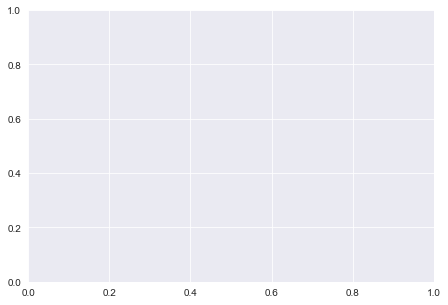

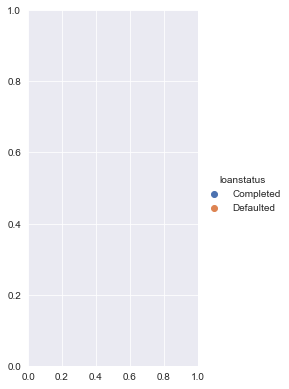

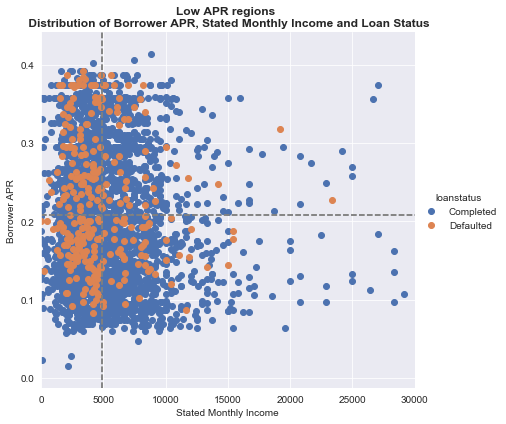

In [61]:
# plotting -- In higher APR regions, plot APR, Stated Monthly Income and Loan Status

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.5)
sb.set_theme({'axes.grid' : True})

plt.subplot(1, 2, 1)
g = sb.FacetGrid(data=df_filter_high, hue='loanstatus', height = 6)
g.map(plt.scatter, 'statedmonthlyincome', 'borrowerapr')
plt.xlim(0,30000)
plt.title ('High APR regions \n Distribution of Borrower APR, Stated Monthly Income and Loan Status', weight='bold')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Borrower APR')
g.refline(x=df_clean["statedmonthlyincome"].median())
g.refline(y=df_clean["borrowerapr"].median())
g.add_legend()

# Plot -- In Low APR regions, plot APR, Stated Monthly Income and Loan Status

plt.subplot(1, 2, 2)
g = sb.FacetGrid(data=df_filter_low, hue='loanstatus', height = 6)
g.map(plt.scatter, 'statedmonthlyincome', 'borrowerapr')
plt.xlim(0,30000)
plt.title ('Low APR regions \n Distribution of Borrower APR, Stated Monthly Income and Loan Status', weight='bold')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Borrower APR')
g.refline(x=df_clean["statedmonthlyincome"].median())
g.refline(y=df_clean["borrowerapr"].median())
g.add_legend()

plt.show();

> Set the median of stated monthly income and borrower APR of all regions as reference lines. In low APR states, most of the defaulted cases occured in the area where below median of stated monthly inome and borrower APR. On the other hand, in high APR regions, the majority of defauled is observed to those below median monthly income but above median borrower APR.

### Q12: Considered the monthly loan payment, montly income, and whether the borrower is the owner of property, how would the condition of defaulted cases in different status of employment of both low and high APR regions? 

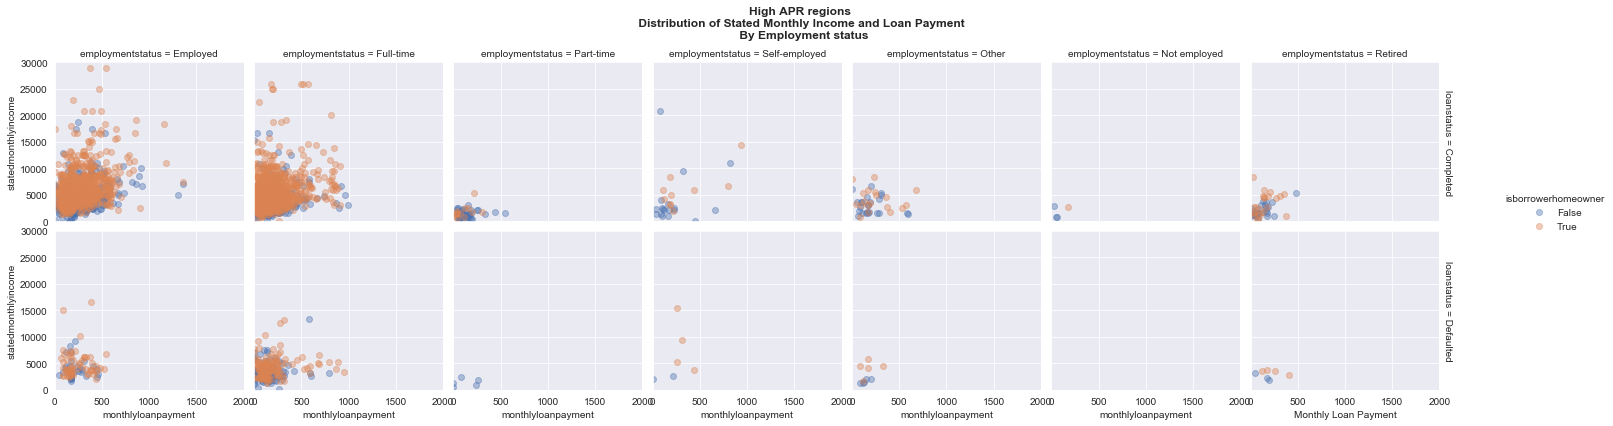

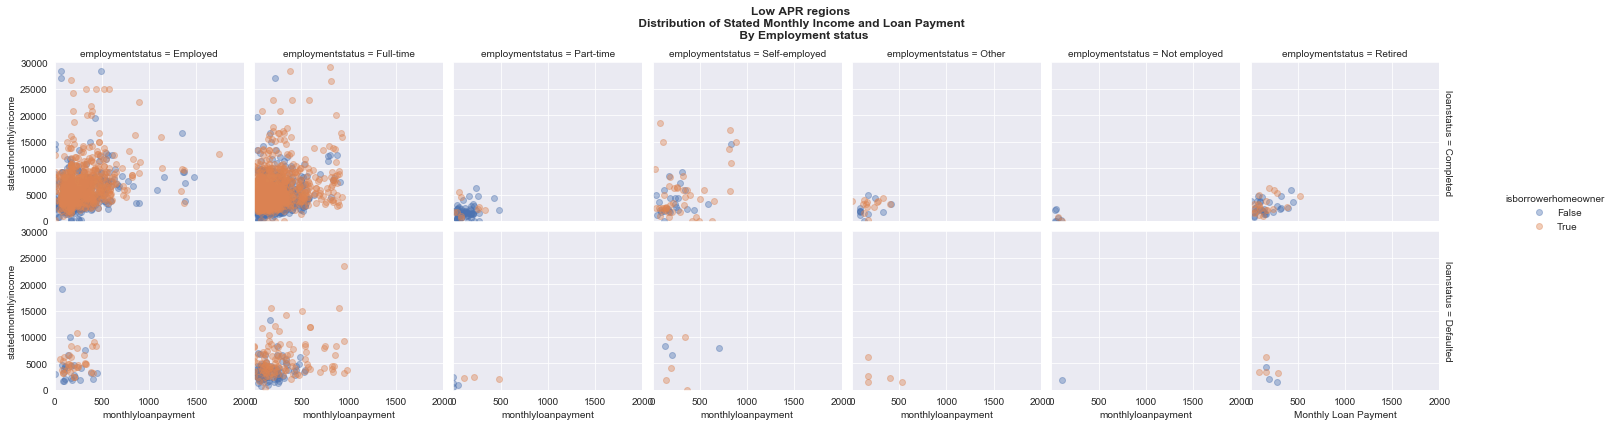

In [60]:
# Plot -- high APR region

g = sb.FacetGrid(data = df_filter_high, col = 'employmentstatus', row = 'loanstatus', 
                 margin_titles = True, hue='isborrowerhomeowner')
g.map(plt.scatter, 'monthlyloanpayment','statedmonthlyincome', alpha=2/5)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('High APR regions \n Distribution of Stated Monthly Income and Loan Payment \n By Employment status', weight='bold')
plt.xlim(0,2000)
plt.ylim(0,30000)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Stated Monthly Income')
g.add_legend()

# Plot -- high APR region

g = sb.FacetGrid(data = df_filter_low, col = 'employmentstatus', row = 'loanstatus', 
                 margin_titles = True, hue='isborrowerhomeowner')
g.map(plt.scatter, 'monthlyloanpayment','statedmonthlyincome', alpha=2/5)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Low APR regions \n Distribution of Stated Monthly Income and Loan Payment \n By Employment status', weight='bold')
plt.xlim(0,2000)
plt.ylim(0,30000)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Stated Monthly Income')
g.add_legend()

plt.show();



> 1. In both high and low APR regions, most defaulted cases are observed for those who are part-time, self-employed, other, not-employed, and retired, and below 500 monthly loan payment and 5000 monthly income.
> 2. Regarding to the employed loan applicants, no matter whether the borrowers own the property, the defaulted cases lies in the segment of monthly payment below 500 and monthly income below 10000.  
> 3. For those who work as full-time job, loan applicants are more likely to be default if the monthly salary is under 10000 and monthly loan payment below 10000 even they are the house owner.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. The visualization shows the annual percentage rate has a strong negative correlation with people having higher annual income and owning a property. <br>
> 2. By seperating regions of high APR and low APR, the characateristics of defaulted cases in different states can be observed. In the states of higher APR, the majority of defaulted applicants are those who below median monthly income but above median borrowering APR. As for the states of lower APR, the defaulted cases lies in the area where borrowers below both median of stated monthly salary and borrowers' APR. <br>
> 3. In both high and low APR regions, a postive correlation between monthly loan payment and monthly inomce can be seen for those completing the loan and work as employed, full time, self-employed, other, and retired. However, the relationship is not so obvious for those who are part-time, not-employed, and defaulted the loan. <br>

### Were there any interesting or surprising interactions between features?

> 1. The box plots in Q10 suggest that it's beneficial to acquire lower annual percentage rate if the loan applicants own a real estate. Among most of the income ranges and employment of status, the house owner obtain a better condition of loan.
> 2. However, a contradition is noticed. In the box revealing the ranges of income, borrowers owning a house but not employed enjoy better condition of APR. On the contrary, in the visualization of employment status, the advantage of owning a property for people not employed is not observed.
> 3. By seperating regions of high APR and low APR, the characateristics of defaulted cases in different states can be observed. In the states of higher APR, the majority of defaulted applicants are those who below median monthly income but above median borrowering APR. As for the states of lower APR, the defaulted cases clusters in the area where borrowers below both median of stated monthly salary and borrowers' APR.
> 4. In Q12, an interesting discovery is that the particularities of defaulted applicants can be seen and listed below: <br>
   a. Part-time / Self-employed / Other / Not-employed / Retired <br>
     ==> Monthly income < 5000 & Monthly loan payment < 500 <br>
     b. Employed (regardless whether is house owner) <br>
     ==> Monthly income < 10000 & Monthly loan payment < 500 <br>
     c. Full-time (regardless whether is house owner) <br>
     ==> Monthly income < 10000 & Monthly loan payment < 1000 <br>


## Conclusions

> The main interest of this project is to understand factors impacting annual percentage rate of borrowers and whether is there any difference of APR among regions by various features. Since the variables of the dataset is very compresensive, the challenge of dealing with it is to reduce the scope. Approximately half of the factors are exclueded based on my personal experience, and the purpose of using a cleaned dataset with reduced variables is to avoid distraction and so that I could concencrate on characteristics that might be critical.

> Attributed to univariate plots, the overview of the dataset is clearly presented. The time span of the data is 8 years from 2007 to 2014, and up to 92% of applicants have full-time job and employed. The range of stated monthly salary and revolving credit balance of most borrowers is from 1.2K to 12K and 1K to 100K accordingly; the mojarity of loan purpose is to consolidate the debt. In addition, there are 40% people with more than 90 months working experience. 60% of annual salary ranges from 25,000 to 74,999 while the percentage for those in the group of high annual income (more than 75,000) is around 32%. From my point of view, it's a shamed that the quenstionaires of occupation is not properly classified and leads to at least one third of borrowers' job is categorized as vague terms, such as 'Other' or "Professional".

> A strong negative correlation among upper and lower range of credit score and annual percentage rate can be observed, which is reasonable for borrowers who have better credits enjoy better conditon of loan. Other features with negative correlation with APR include available bankcard credit, the orginal amount of loan, the percentage of trades never delingquent, and monthly loan payment. On the other hand, the heatmap reveals that the higher utilization of bank card causes higher cost of borrowing. Furthermore, the relationship among various categorical variables and APR is also discussed. People whose employment status categorized as "Other" have highest cost of borrowing while similar level of APR can ben seen for those who have full-time, part-time job, not-employed and self-employed. From the perspective of income range, generally speaking, the higher annual income leads to the lower cost of borrowing. Interestingly, borrowers who are out of job enjoy the same level of APR as those with the highest annual income. Among the top 8 purposes of loan, it's most expenseive if the money is borrowed for house expenses; engnineers and business executives enjoy th least average APR and the similar APR level is seen for the rest occupations.

> In the final section of the analysis, the visualization depicts the areas where the defaulted cases clustered among various features including borrowers' APR, status of employment, stated monthly income and loan payment by regions of different levels of APR. In low APR regions, most fefaulted happened to those below median monthly slary but above median borrower APR while people are more likely to default if stated monthly inome and borrower APR are under the median in high APR region. Finally, the conditions of defaulted by various emlpoyment status and whether borrowers are house owner is analyzed. In-depth multivariate plots describe at which circumstances of montly income and loan payment would the default more likely be.

> In summary, the project demonstrates the intrinsic overview of the loan borrowers in Prosper from 2007 to 2014, including the regions of the least rate of default and people in which state in average suffers from the highest cost of borrower. The relationships among cost of borrowing and many other features are also presented; the analysis shows owning a property is benefical for reducing the annual percentage rate and which occupations enjoy the best condition of borrowing cost. At last, though not all the characeristics are reviewed, most features related to the interest of the variables are investigated and a clear picture of default and correlation of APR is given.


